In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import geopandas as gpd
from shapely.geometry import Point
import shapely
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel('/Users/VarshiniSelvadurai/Documents/Internship/Crime_Edited.xlsx', sheet_name = 'Crime_LatLon')
#data = pd.read_excel('C:\\Users\\vns8\\Documents\\Crime_Edited.xlsx', sheet_name = 'Crime_LatLon')
data = data.loc[data["Crime Name1"] != "Not a Crime"]
data = data.drop(columns = ["Police District Number","Address Number","Victims","CR Number","NIBRS Code","Beat","PRA","State","Incident ID","Offence Code","Sector"])
ugh = list(map(str, data["Start Time"]))
for i in range (0, len(ugh)):
    ugh[i] = ugh[i][:2]
data["Start Time"] = ugh
ugh = (list(map(str,data['Start Date'])))
ughh = []
for i in range(0,len(ugh)):
    ugh[i] = ugh[i][5:]
    ugh[i] = ugh[i][:5]
data['Start Date'] = ugh

In [4]:
def names(Name,title,size):
    namevalues = list(map(str, data[Name].value_counts().keys().tolist()))
    namecounts = list(map(int, data[Name].value_counts().tolist()))
    crimename = pd.DataFrame({'Type':namevalues,'repeat':namecounts})
    namebar = (crimename).sort_values(['repeat'])
    ax = namebar.plot(x = 'Type', y = 'repeat', kind = 'barh', figsize = size,title = title,legend = False)
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+100, i.get_y()+.19,str(i.get_width()))

# Count of crime based on name

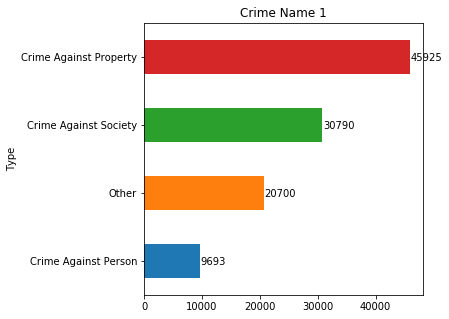

In [5]:
names("Crime Name1", "Crime Name 1",(5,5))

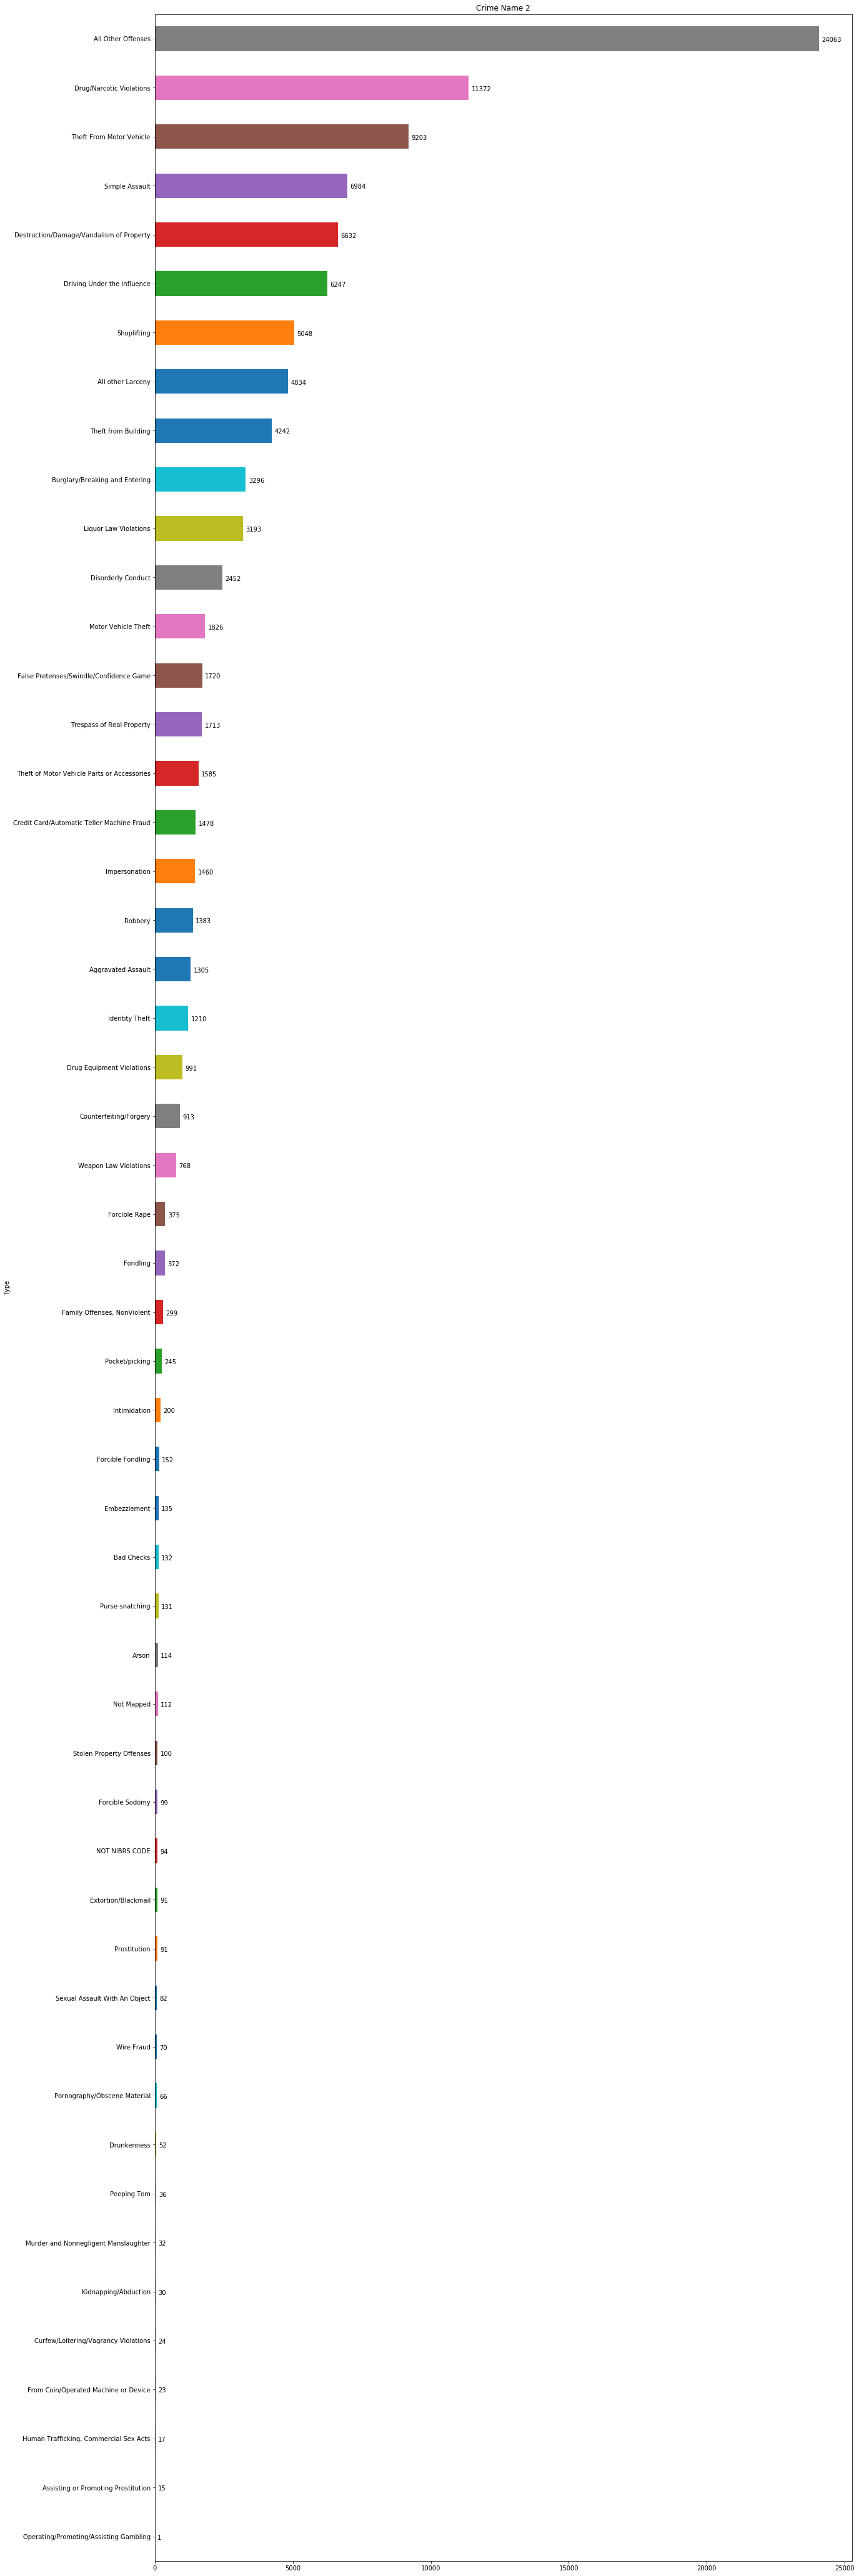

In [6]:
names("Crime Name2", "Crime Name 2",(20,75))

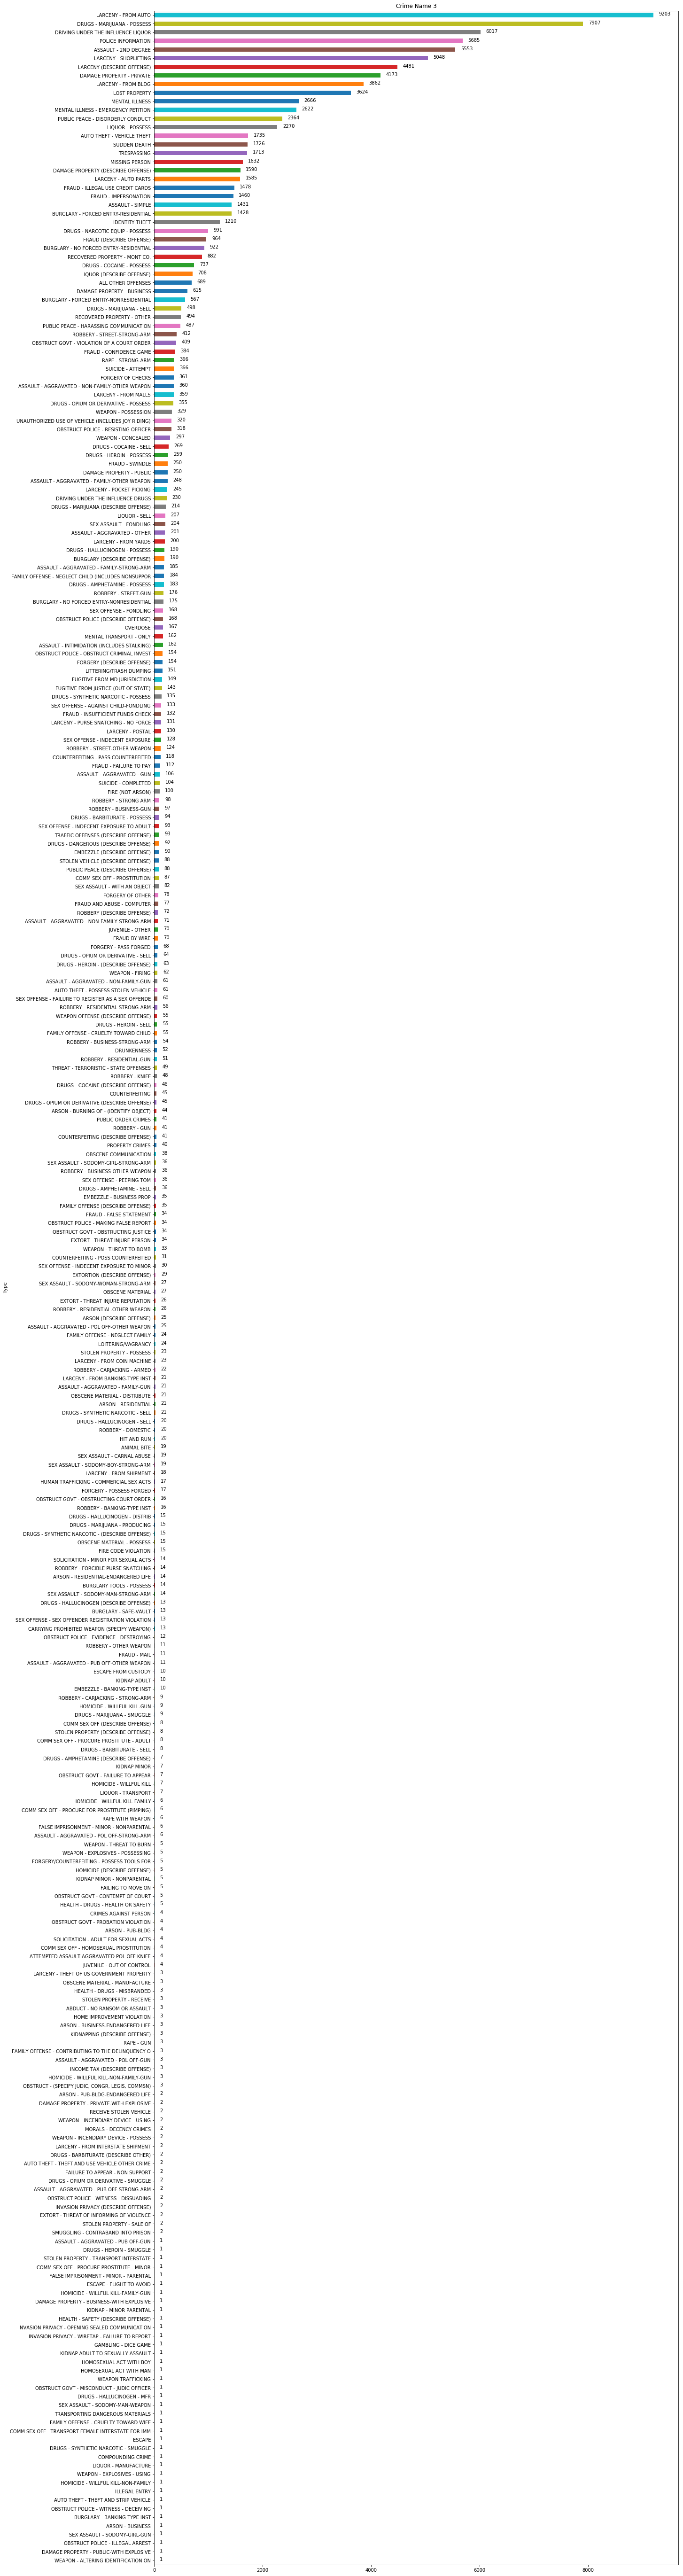

In [7]:
names("Crime Name3", "Crime Name 3",(20,100))

In [8]:
def weekandcount(data,w,title):
    bruh = [[0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0]]
    for index, row in data.iterrows():
        if (row['Start Day'] == "Monday"):
            i = 6
        elif (row['Start Day'] == "Tuesday"):
            i = 5
        elif (row['Start Day'] == "Wednesday"):
            i = 4
        elif (row['Start Day'] == "Thursday"):
            i = 3
        elif (row['Start Day'] == "Friday"):
            i = 2
        elif (row['Start Day'] == "Saturday"):
            i = 1
        elif (row['Start Day'] == "Sunday"):
            i = 0
        if (row['Crime Name1']) == "Crime Against Society":
            bruh[1][i] +=1
        elif (row['Crime Name1']) == "Crime Against Person":
            bruh[2][i] +=1
        elif(row['Crime Name1']) == "Other":
            bruh[3][i] +=1
        elif(row['Crime Name1']) == "Crime Against Property":
            bruh[0][i] +=1
    dayvalues = list(map(str, data['Start Day'].value_counts().keys().tolist()))
    daycounts = list(map(int, data['Start Day'].value_counts().tolist()))
    daysofweek = pd.DataFrame({'day':dayvalues,'count':daycounts})
    order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    order.reverse()
    mapping = {day: i for i, day in enumerate(order)}
    key = daysofweek['day'].map(mapping)
    daybar = daysofweek.iloc[key.argsort()]
    daybar["CAProp"] = bruh[0]
    daybar["CASoc"] = bruh[1]
    daybar["CAPer"] = bruh[2]
    daybar["Other"] = bruh[3]
    ax = daybar.plot(x = 'day', y = 'count', kind = 'barh', figsize = (20,20),title = title, legend = False)
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+w, i.get_y()+.19,str(i.get_width()))
    ugh = daybar["count"]
    daybar = daybar.drop(["count"],axis = 1)
    ax = daybar.plot.barh(figsize = (20,20),stacked = True,x = 'day')
    daybar["count"] = ugh
    #for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
    #    ax.text(i.get_width()+15000, i.get_y()+.19,str(i.get_width()))

# Count of crime based on weekday

/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

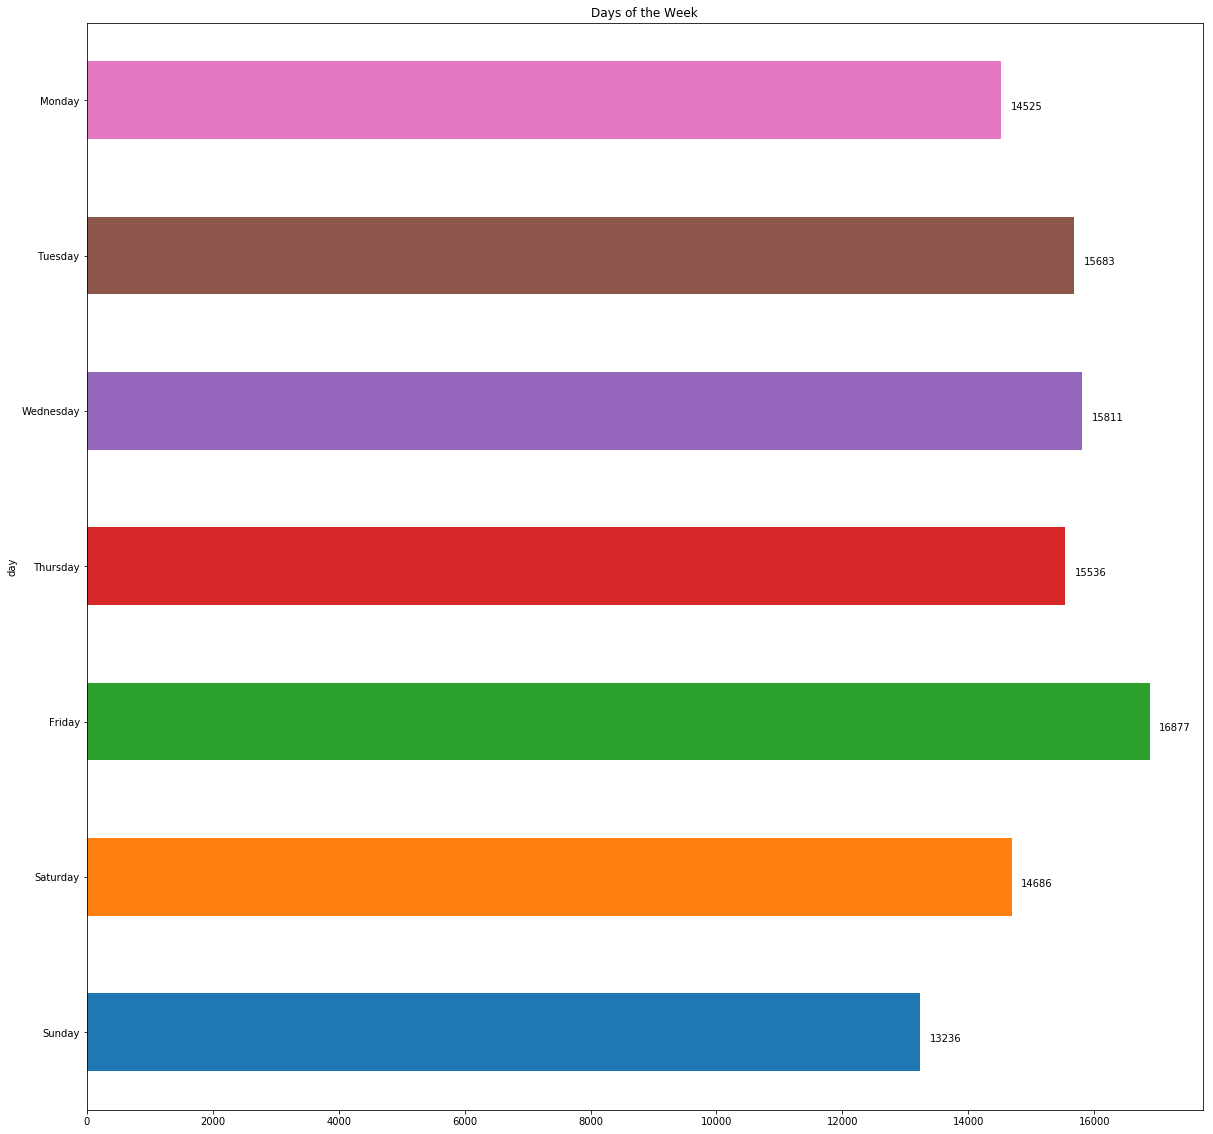

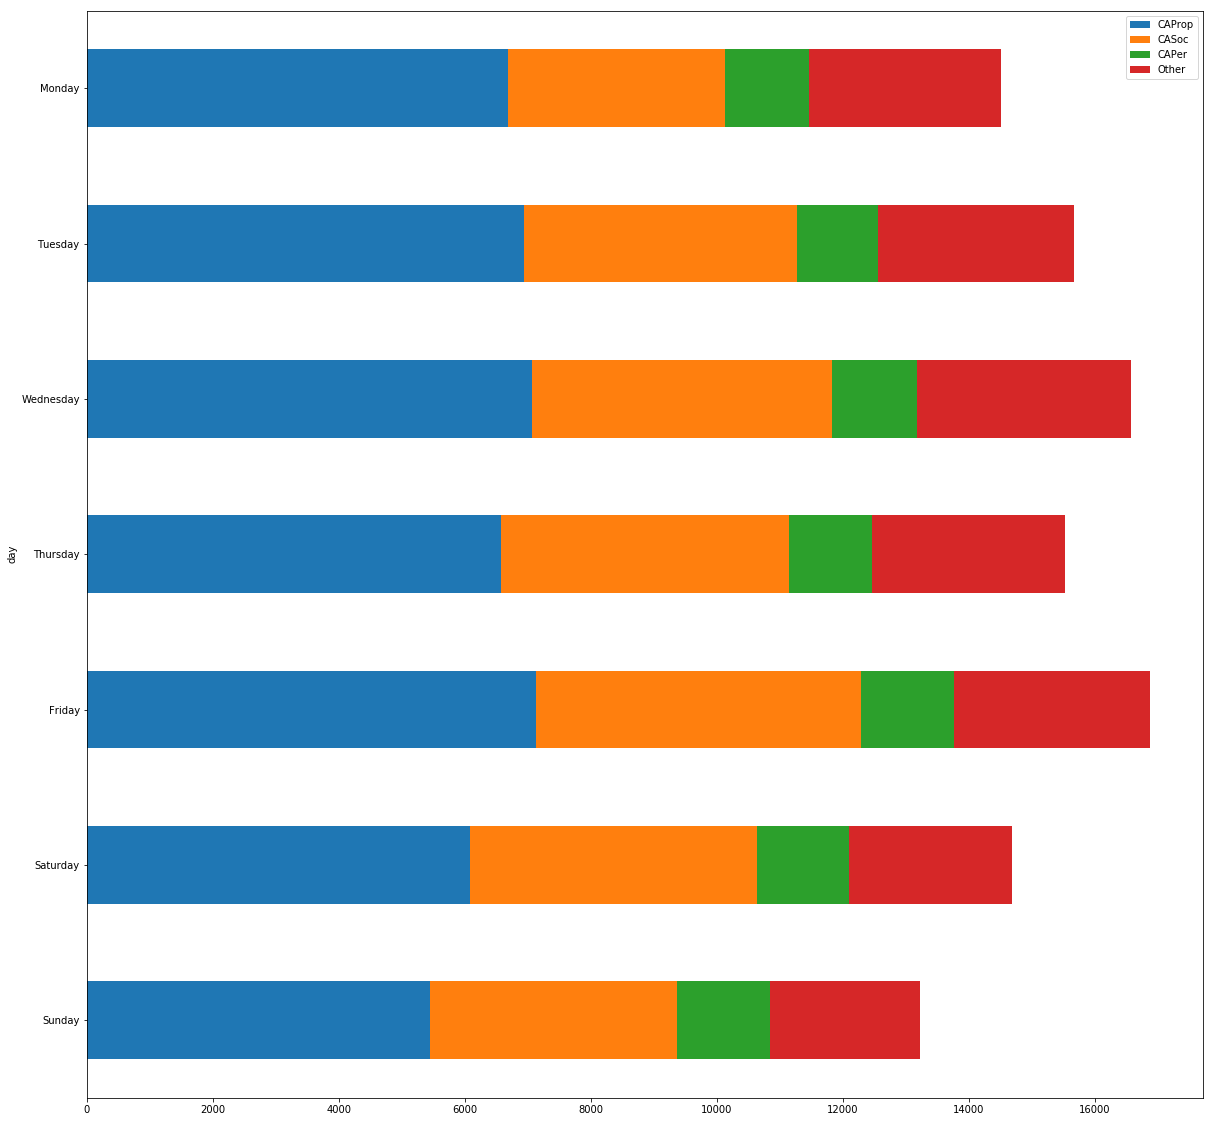

In [9]:
weekandcount(data,150,"Days of the Week")

In [10]:
def dayandcount(data,w):
    datevalues = list(map(str, data['Start Date'].value_counts().keys().tolist()))
    datecounts = list(map(int, data['Start Date'].value_counts().tolist()))
    ughh = []
    ughhh = []
    date = pd.DataFrame({'Date':datevalues,'count':datecounts})
    ugh = list(map(str,date['Date']))
    for i in range(0,len(date)):
        ughh.append(ugh[i][:2])
        ughhh.append(ugh[i][3:])
    date['month'] = ughh
    date['day'] = ughhh
    date = (date).sort_values(['Date'])
    bruh = [0]*366
    bruh1 = [0]*366
    bruh2 = [0]*366
    bruh3 = [0]*366
    ugh = []
    datevalues.sort()
    for index, row in data.iterrows():  
        if (row['Crime Name1']) == "Crime Against Society":
            bruh1[datevalues.index(row['Start Date'])] +=1
            #print(row['Start Date'],datevalues.index(row['Start Date']),row["Crime Name1"])
            #print(bruh1)
        elif (row['Crime Name1']) == "Crime Against Person":
            bruh2[datevalues.index(row['Start Date'])] +=1
        elif(row['Crime Name1']) == "Other":
            bruh3[datevalues.index(row['Start Date'])] +=1
        elif(row['Crime Name1']) == "Crime Against Property":
            bruh[datevalues.index(row['Start Date'])] +=1
    date["Crime Against Property"] = bruh
    date["Crime Against Society"] = bruh1
    date["Crime Against Person"] = bruh2
    date["Other"] = bruh3
    date = date.drop([0],axis = 0)
    date = date.iloc[::-1]
    ax = date.plot(x = 'Date', y = 'count', kind = 'barh', figsize = (20,500),title = "Date", legend = False, fontsize = 12)
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+w, i.get_y()+.19,str(i.get_width()))
    ugh = date["count"]
    date = date.drop(["count"],axis = 1)
    ax = date.plot.barh(figsize = (20,500),stacked = True,x = 'Date')
    date["count"] = ugh
    return date

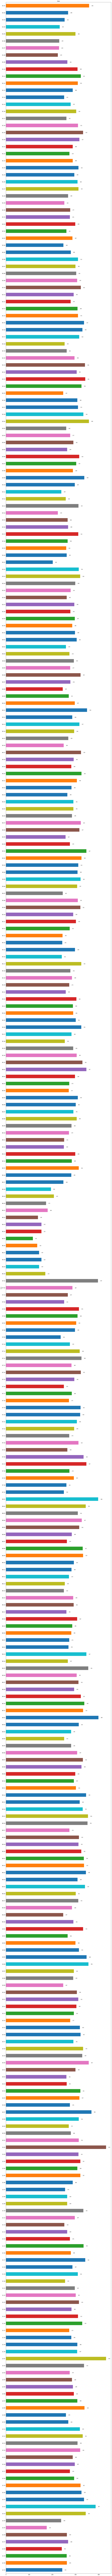

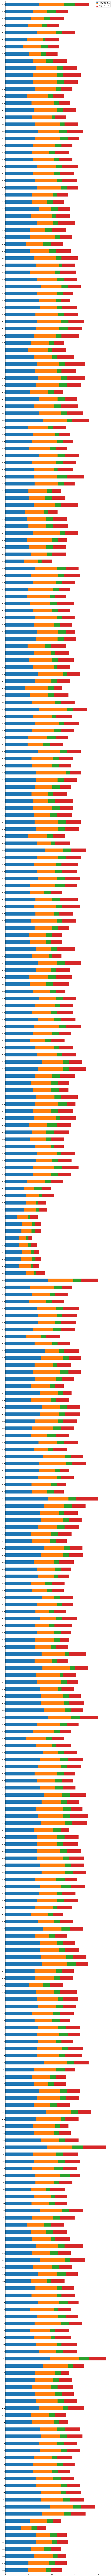

In [11]:
date = dayandcount(data,10)

In [12]:
def yeartomonth(date):
    jan = date.loc[date['month'] == "01"]
    feb = date.loc[date['month'] == "02"]
    mar = date.loc[date['month'] == "03"]
    apr = date.loc[date['month'] == "04"]
    may = date.loc[date['month'] == "05"]
    jun = date.loc[date['month'] == "06"]
    jul = date.loc[date['month'] == "07"]
    aug = date.loc[date['month'] == "08"]
    sep = date.loc[date['month'] == "09"]
    octo = date.loc[date['month'] == "10"]
    nov = date.loc[date['month'] == "11"]
    dec = date.loc[date['month'] == "12"]
    return jan,feb,mar,apr,may,jun,jul,aug,sep,octo,nov,dec

In [13]:
jan,feb,mar,apr,may,jun,jul,aug,sep,octo,nov,dec = yeartomonth(date)

In [14]:
def monthh(mon,title):
    daycount = [0]*31
    cap = [0]*31
    cas = [0]*31
    capp = [0]*31
    oth = [0]*31
    mon = mon.sort_values(['Date'])
    i = 0
    for index, row in mon.iterrows():
        daycount[i] = row['count']
        cap[i] = row['Crime Against Property']
        cas[i] = row['Crime Against Society']
        capp[i] = row['Crime Against Person']
        oth[i] = row['Other']
        i = i + 1
    mon = mon.iloc[::-1]
    ax = mon.plot(x = 'Date', y = 'count', kind = 'barh', figsize = (20,20),title = title, legend = False, fontsize = 12)
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+10, i.get_y()+.19,str(i.get_width()))
    ugh = mon["count"]
    mon = mon.drop(["count"],axis = 1)
    ax = mon.plot.barh(figsize = (20,20),stacked = True,x = 'Date',title = title)
    mon["count"] = ugh

In [15]:
def monthandcount(jan,feb,mar,apr,may,jun,jul,aug,sep,octo,nov,dec):
    monthh(jan,"January")
    monthh(feb,"February")
    monthh(mar,"March")
    monthh(apr,"April")
    monthh(may,"May")
    monthh(jun,"June")
    monthh(jul,"July")
    monthh(aug,"August")
    monthh(sep,"September")
    monthh(octo,"October")
    monthh(nov,"November")
    monthh(dec,"December")
    ugh =[]
    ugh.append(jan['count'].sum())
    ugh.append(feb['count'].sum())
    ugh.append(mar['count'].sum())
    ugh.append(apr['count'].sum())
    ugh.append(may['count'].sum())
    ugh.append(jun['count'].sum())
    ugh.append(jul['count'].sum())
    ugh.append(aug['count'].sum())
    ugh.append(sep['count'].sum())
    ugh.append(octo['count'].sum())
    ugh.append(nov['count'].sum())
    ugh.append(dec['count'].sum())

    ughh =[]
    ughh.append(jan['Crime Against Property'].sum())
    ughh.append(feb['Crime Against Property'].sum())
    ughh.append(mar['Crime Against Property'].sum())
    ughh.append(apr['Crime Against Property'].sum())
    ughh.append(may['Crime Against Property'].sum())
    ughh.append(jun['Crime Against Property'].sum())
    ughh.append(jul['Crime Against Property'].sum())
    ughh.append(aug['Crime Against Property'].sum())
    ughh.append(sep['Crime Against Property'].sum())
    ughh.append(octo['Crime Against Property'].sum())
    ughh.append(nov['Crime Against Property'].sum())
    ughh.append(dec['Crime Against Property'].sum())

    ughhh =[]
    ughhh.append(jan['Crime Against Society'].sum())
    ughhh.append(feb['Crime Against Society'].sum())
    ughhh.append(mar['Crime Against Society'].sum())
    ughhh.append(apr['Crime Against Society'].sum())
    ughhh.append(may['Crime Against Society'].sum())
    ughhh.append(jun['Crime Against Society'].sum())
    ughhh.append(jul['Crime Against Society'].sum())
    ughhh.append(aug['Crime Against Society'].sum())
    ughhh.append(sep['Crime Against Society'].sum())
    ughhh.append(octo['Crime Against Society'].sum())
    ughhh.append(nov['Crime Against Society'].sum())
    ughhh.append(dec['Crime Against Society'].sum())

    ughhhh =[]
    ughhhh.append(jan['Crime Against Person'].sum())
    ughhhh.append(feb['Crime Against Person'].sum())
    ughhhh.append(mar['Crime Against Person'].sum())
    ughhhh.append(apr['Crime Against Person'].sum())
    ughhhh.append(may['Crime Against Person'].sum())
    ughhhh.append(jun['Crime Against Person'].sum())
    ughhhh.append(jul['Crime Against Person'].sum())
    ughhhh.append(aug['Crime Against Person'].sum())
    ughhhh.append(sep['Crime Against Person'].sum())
    ughhhh.append(octo['Crime Against Person'].sum())
    ughhhh.append(nov['Crime Against Person'].sum())
    ughhhh.append(dec['Crime Against Person'].sum())

    ughhhhh =[]
    ughhhhh.append(jan['Other'].sum())
    ughhhhh.append(feb['Other'].sum())
    ughhhhh.append(mar['Other'].sum())
    ughhhhh.append(apr['Other'].sum())
    ughhhhh.append(may['Other'].sum())
    ughhhhh.append(jun['Other'].sum())
    ughhhhh.append(jul['Other'].sum())
    ughhhhh.append(aug['Other'].sum())
    ughhhhh.append(sep['Other'].sum())
    ughhhhh.append(octo['Other'].sum())
    ughhhhh.append(nov['Other'].sum())
    ughhhhh.append(dec['Other'].sum())
    
    month = pd.DataFrame({"months": ["Jan",'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], 'counts':ugh, "Crime Against Property":ughh, "Crime Against Society":ughhh,'Crime Against Person':ughhhh,'Other':ughhhh})
    ax = month.iloc[::-1].plot(x = 'months', y = 'counts', kind = 'barh', figsize = (20,20),title = 'Months', legend = False, fontsize = 12)
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+1, i.get_y()+.19,str(i.get_width()))
    ugh = month["counts"]
    month = month.drop(["counts"],axis = 1)
    ax = month.iloc[::-1].plot.barh(figsize = (20,20),stacked = True,x = 'months',title = "Months")
    month["counts"] = ugh

# Crime by Date and Month

/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


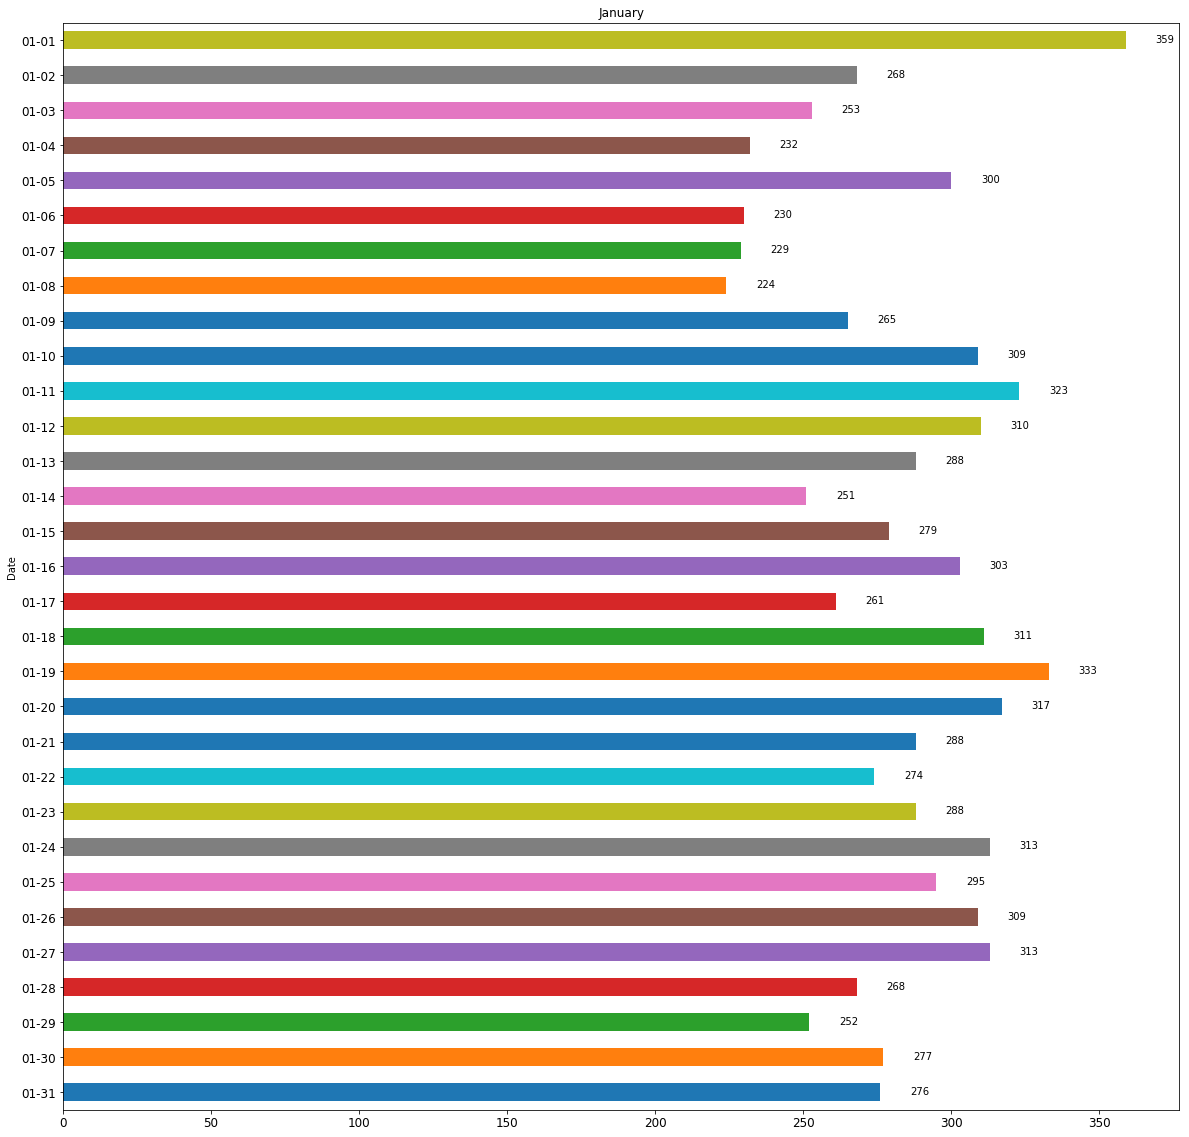

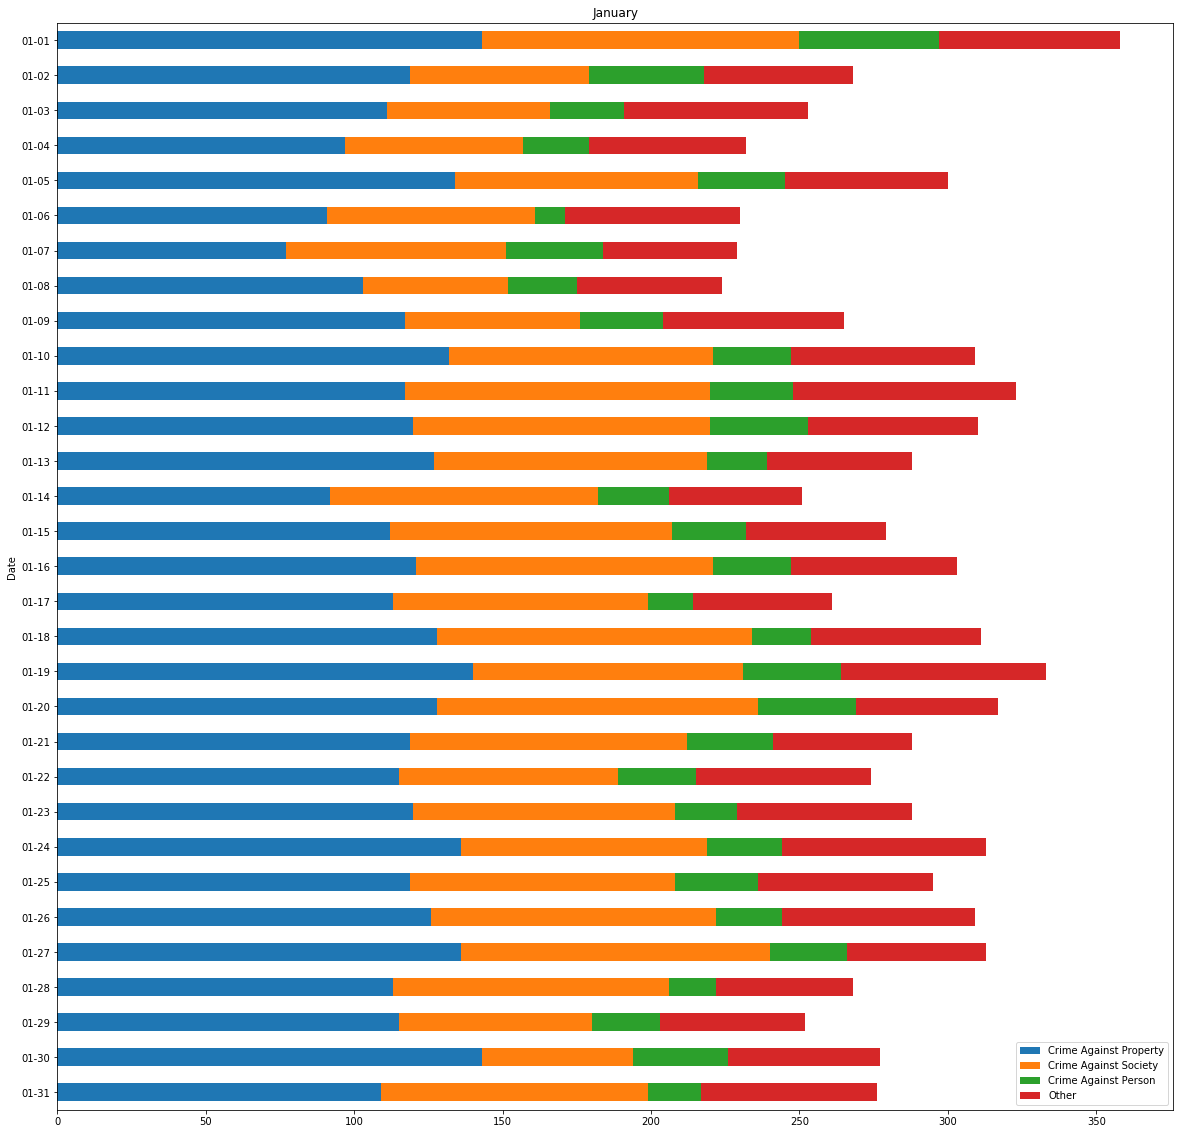

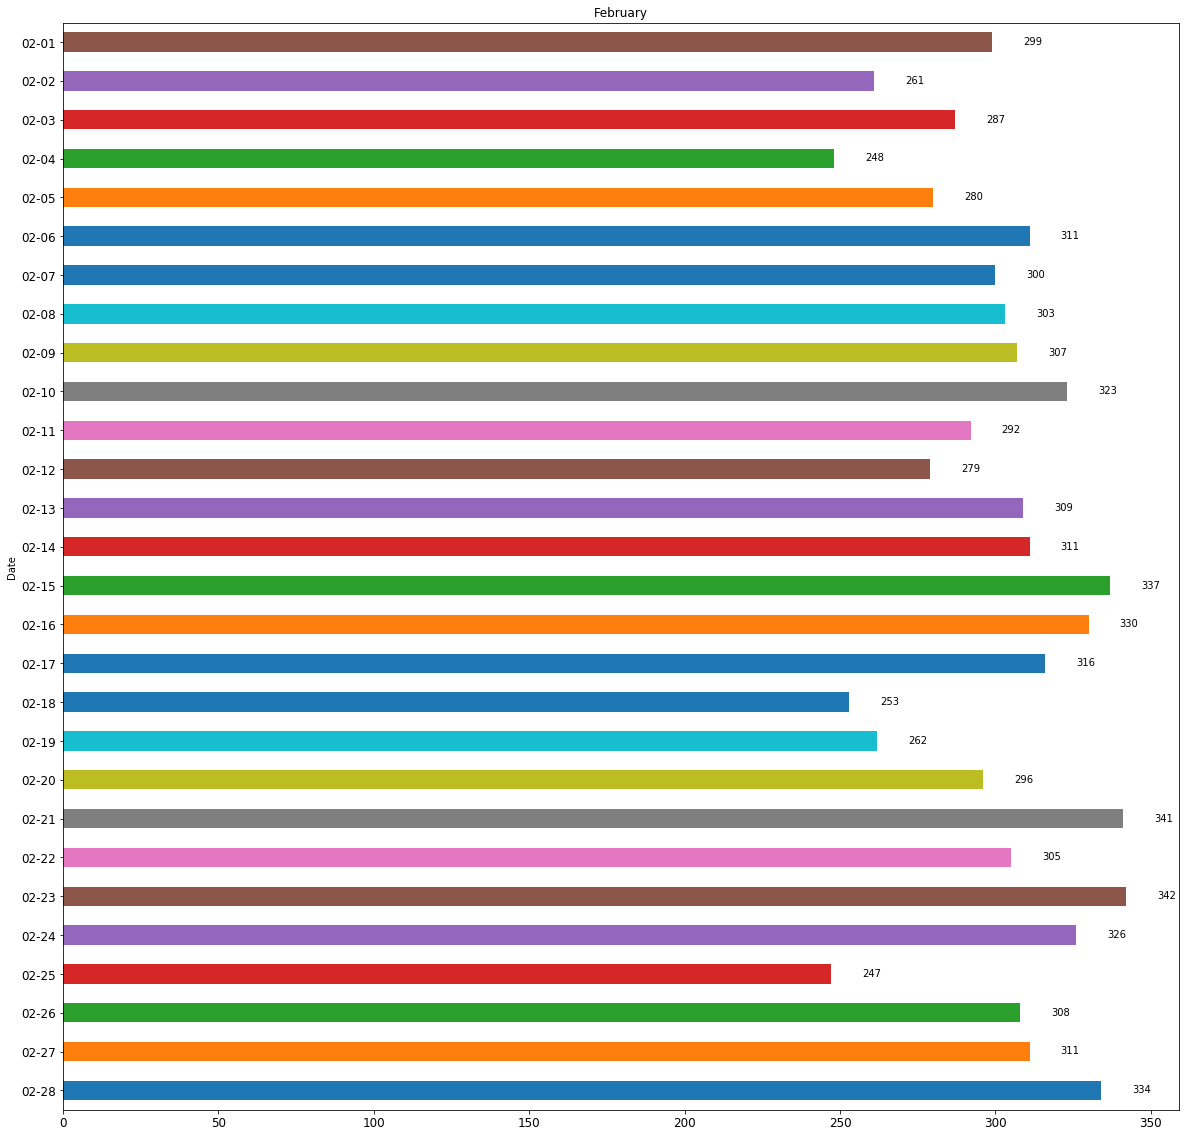

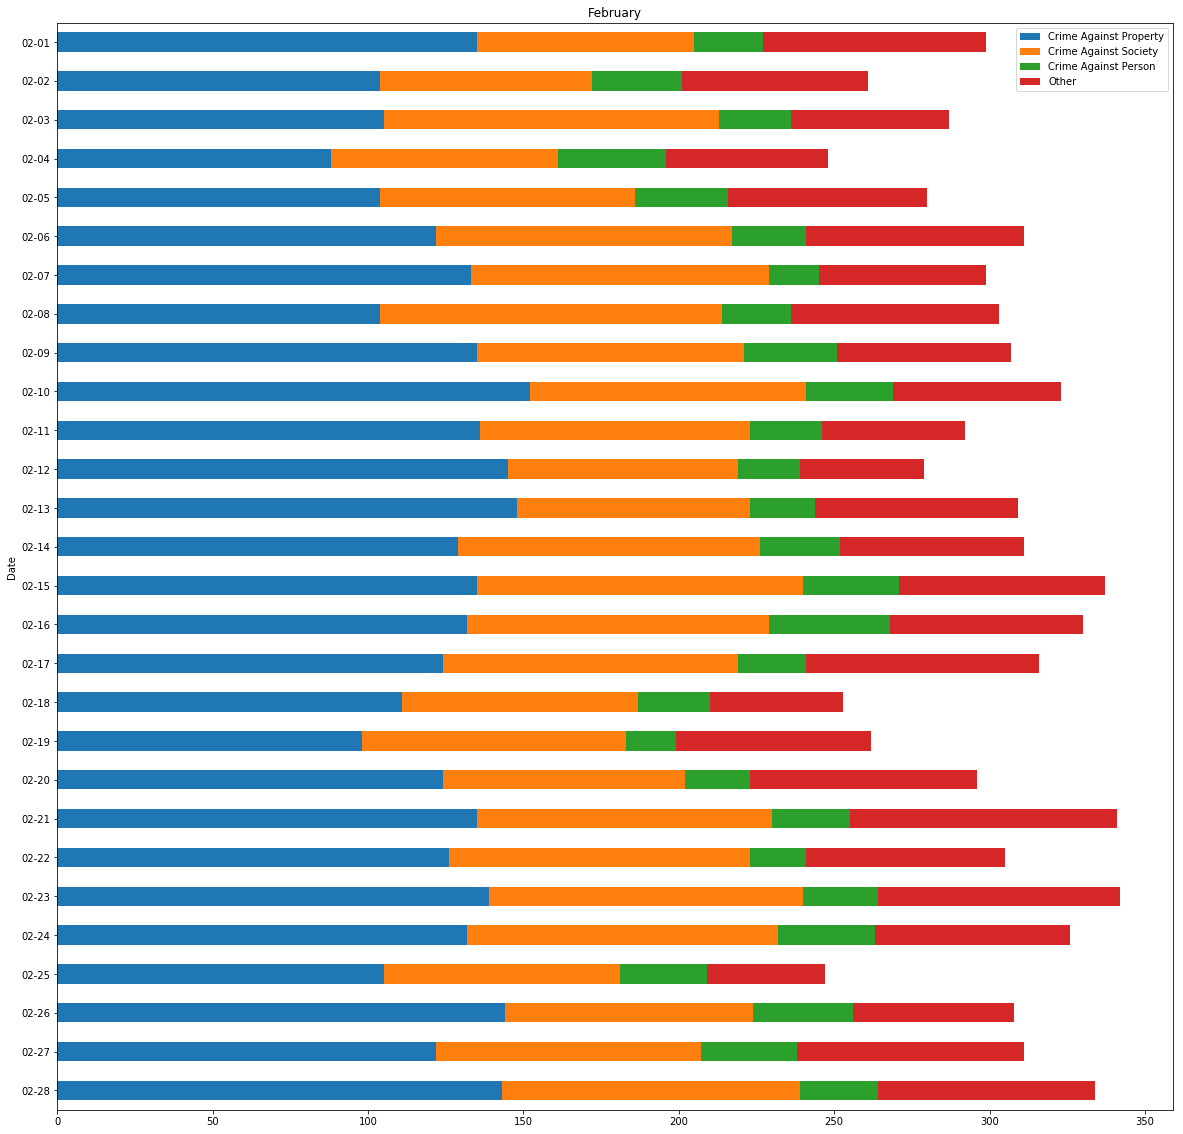

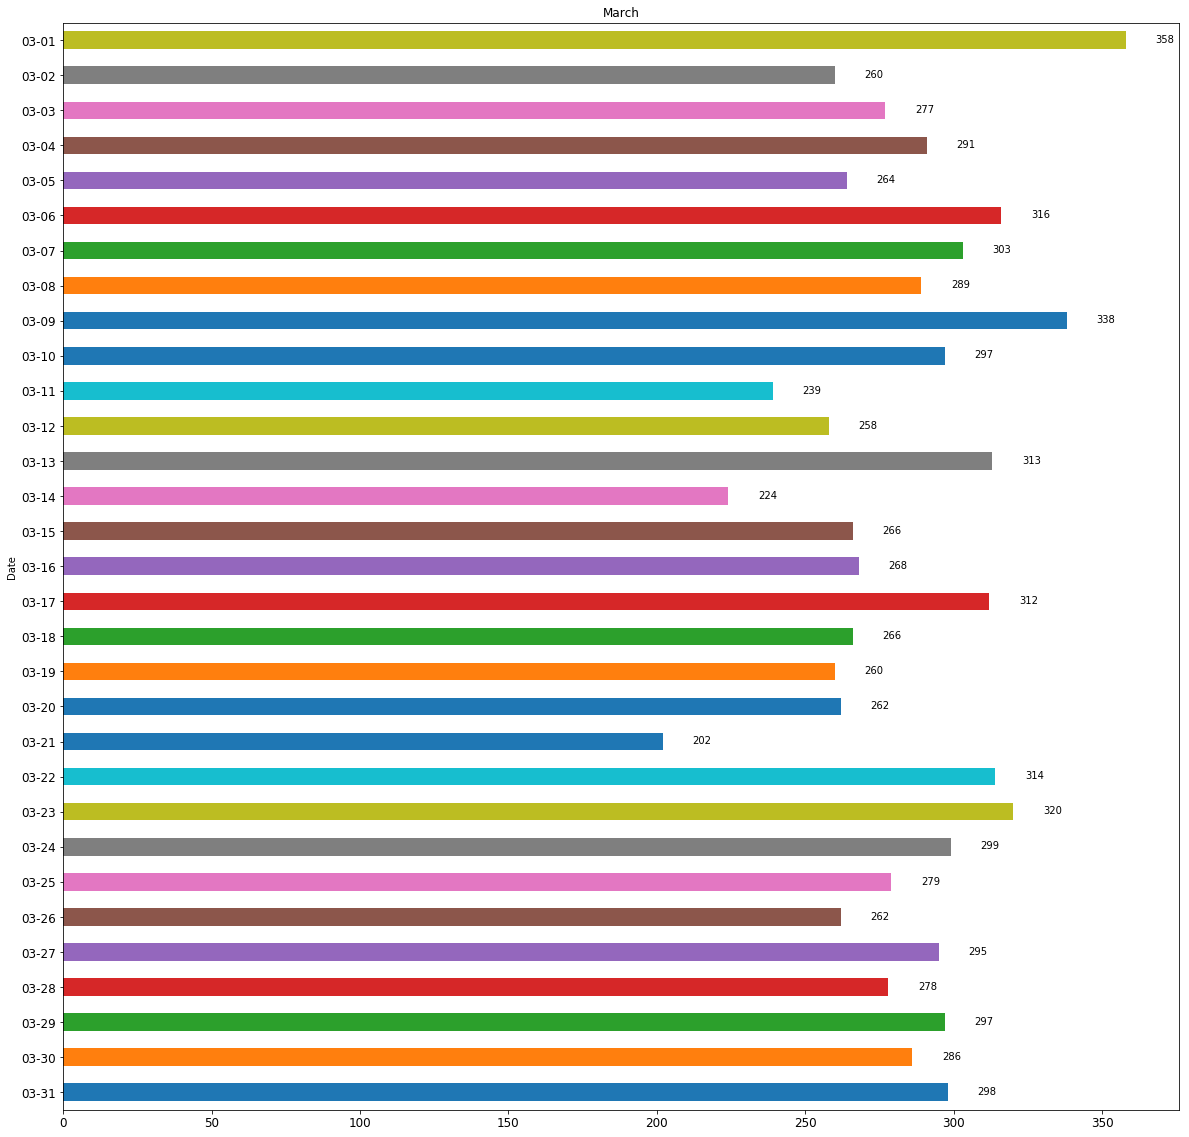

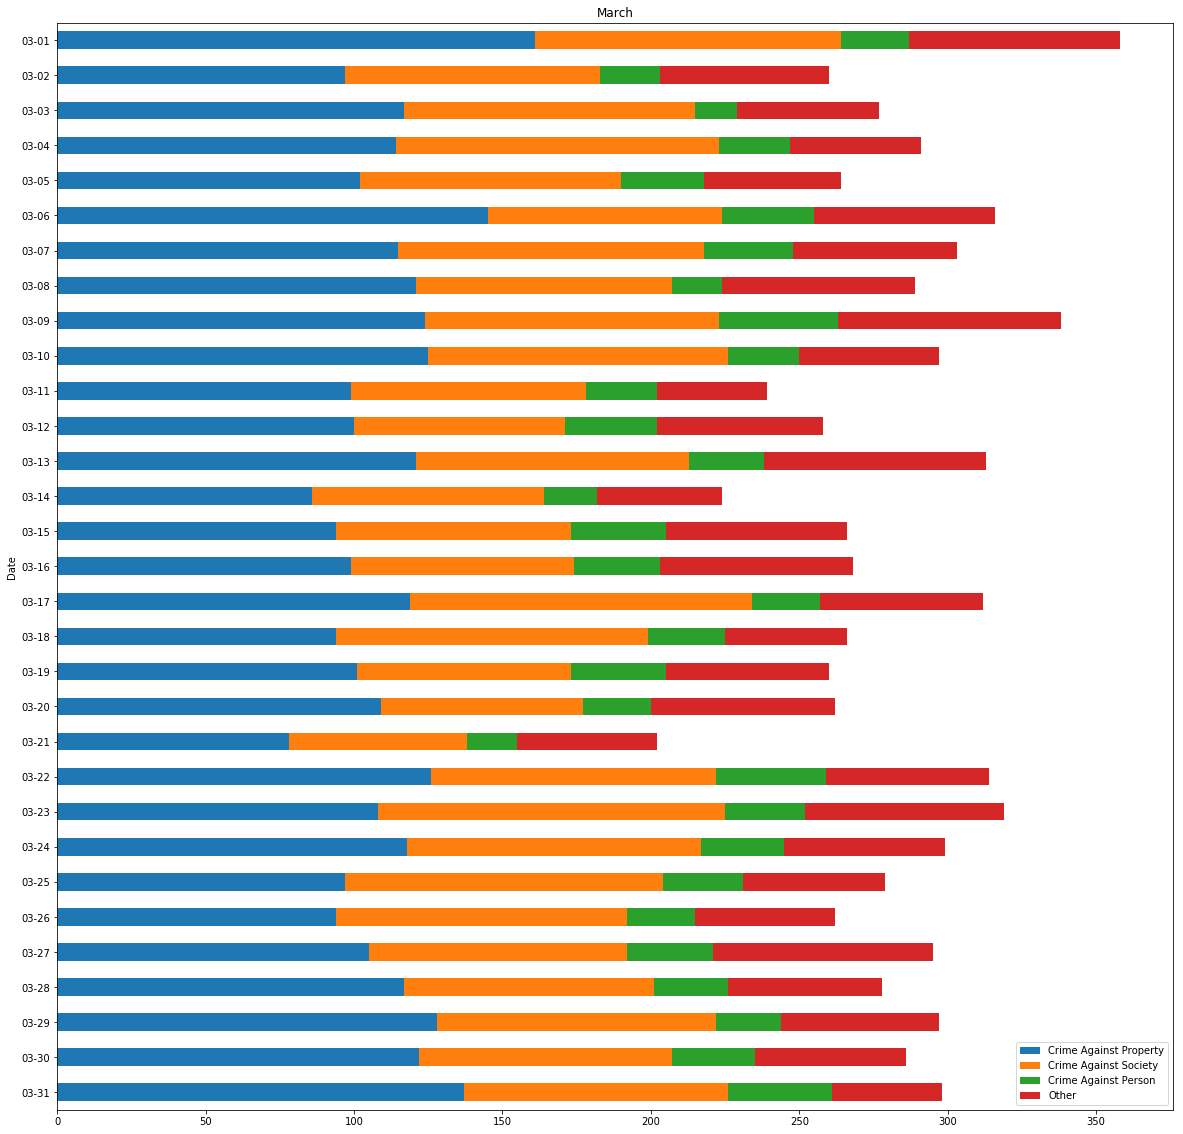

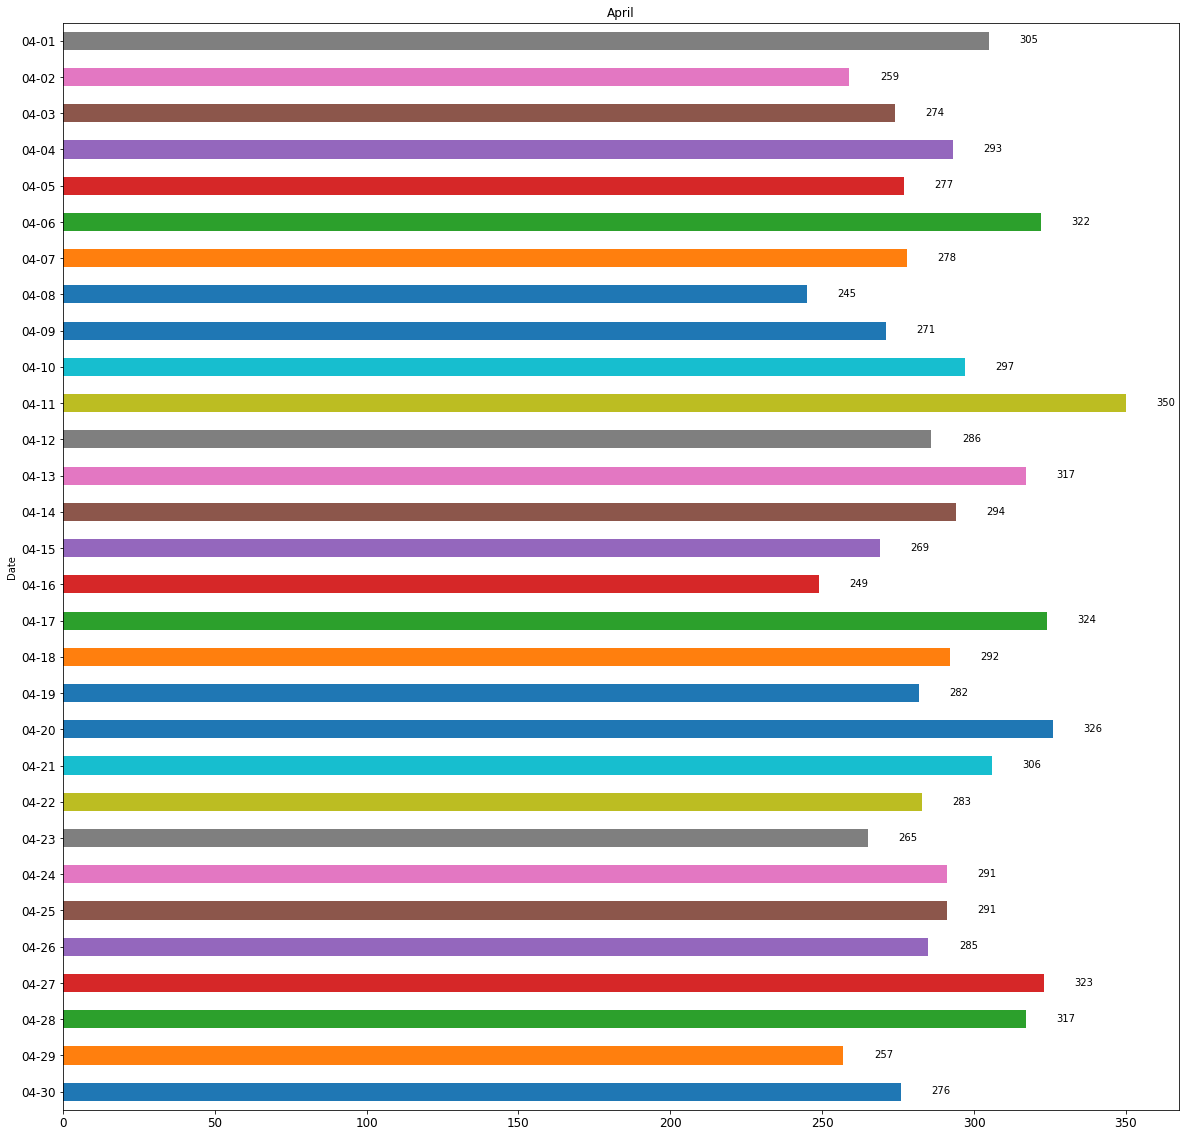

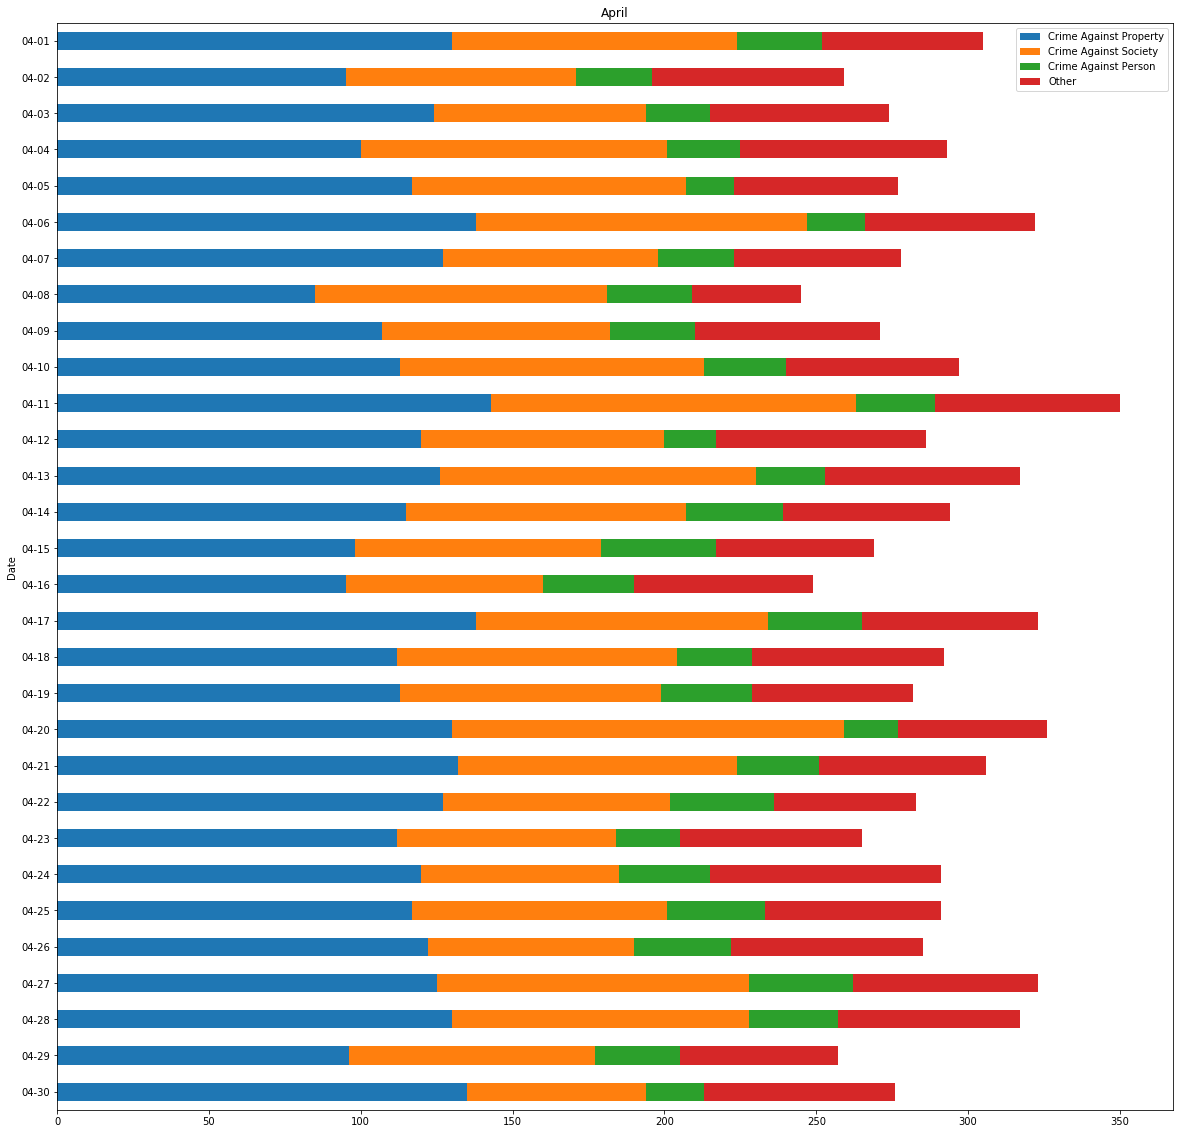

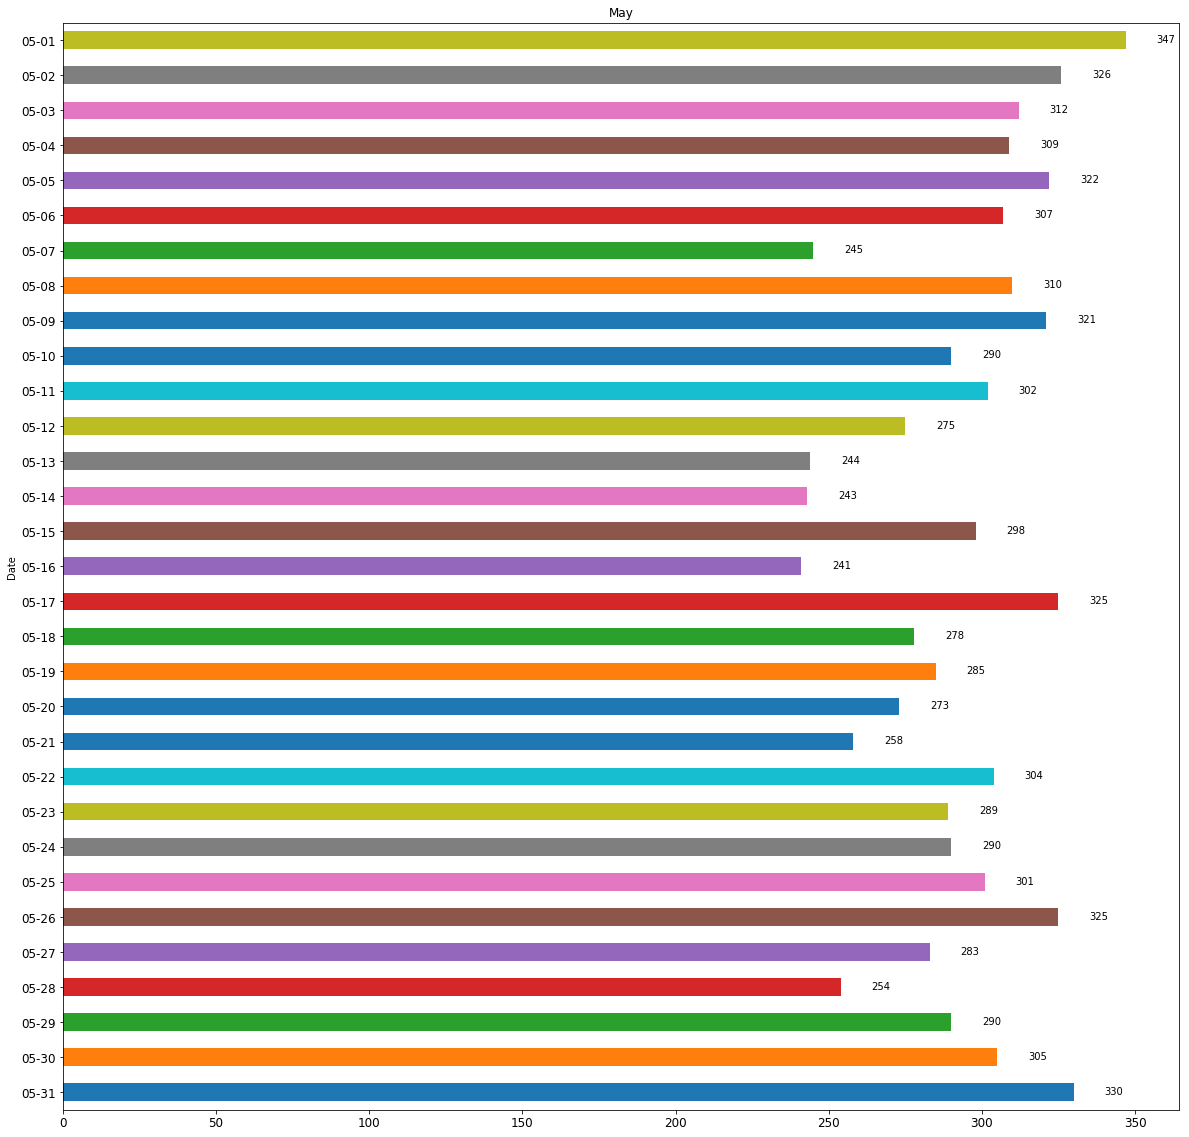

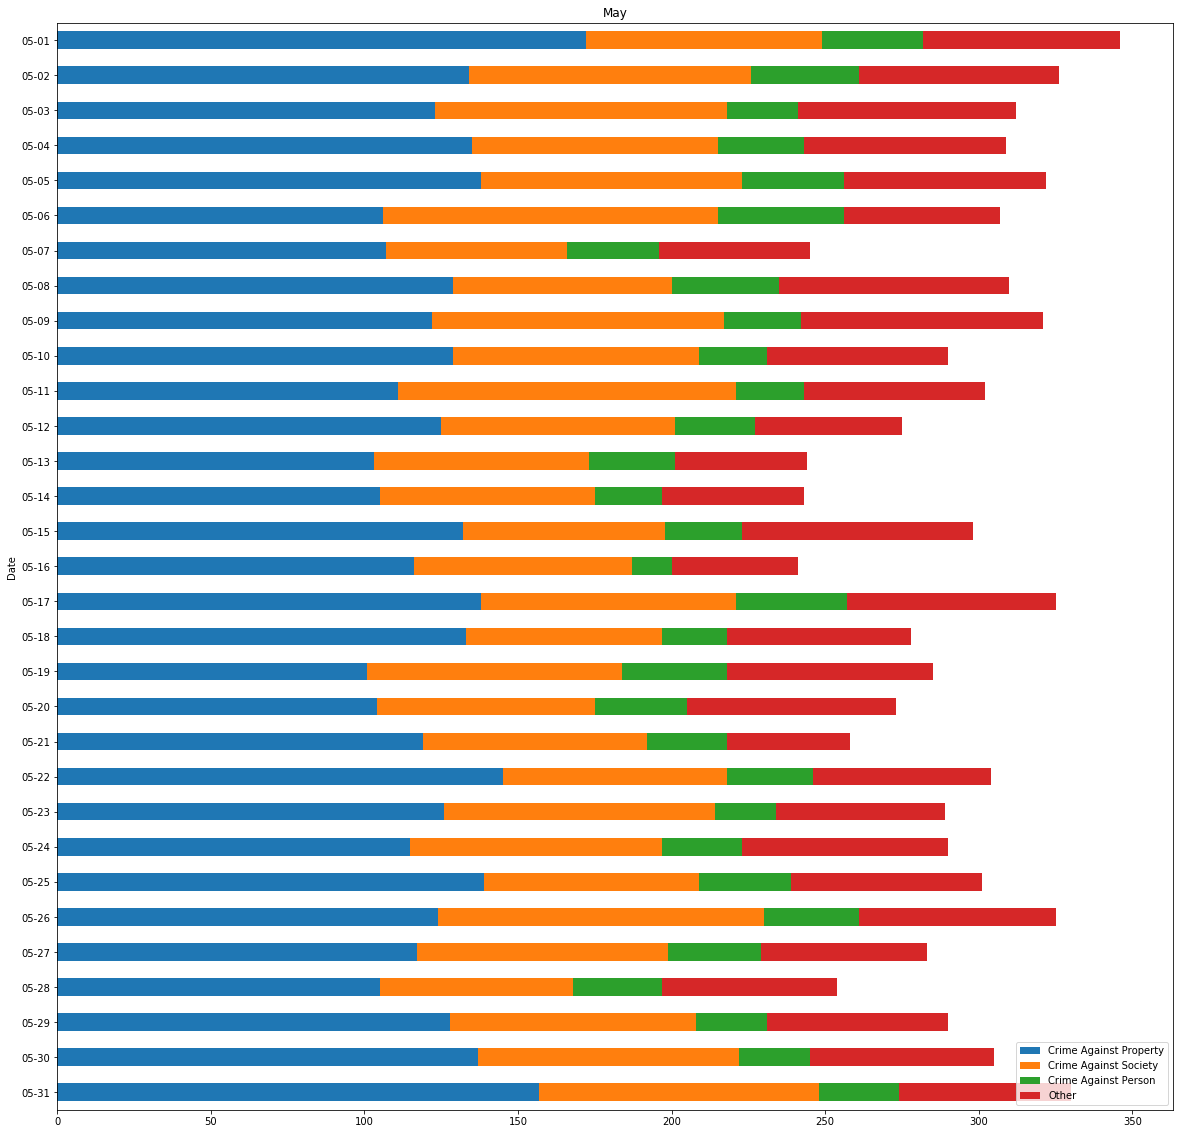

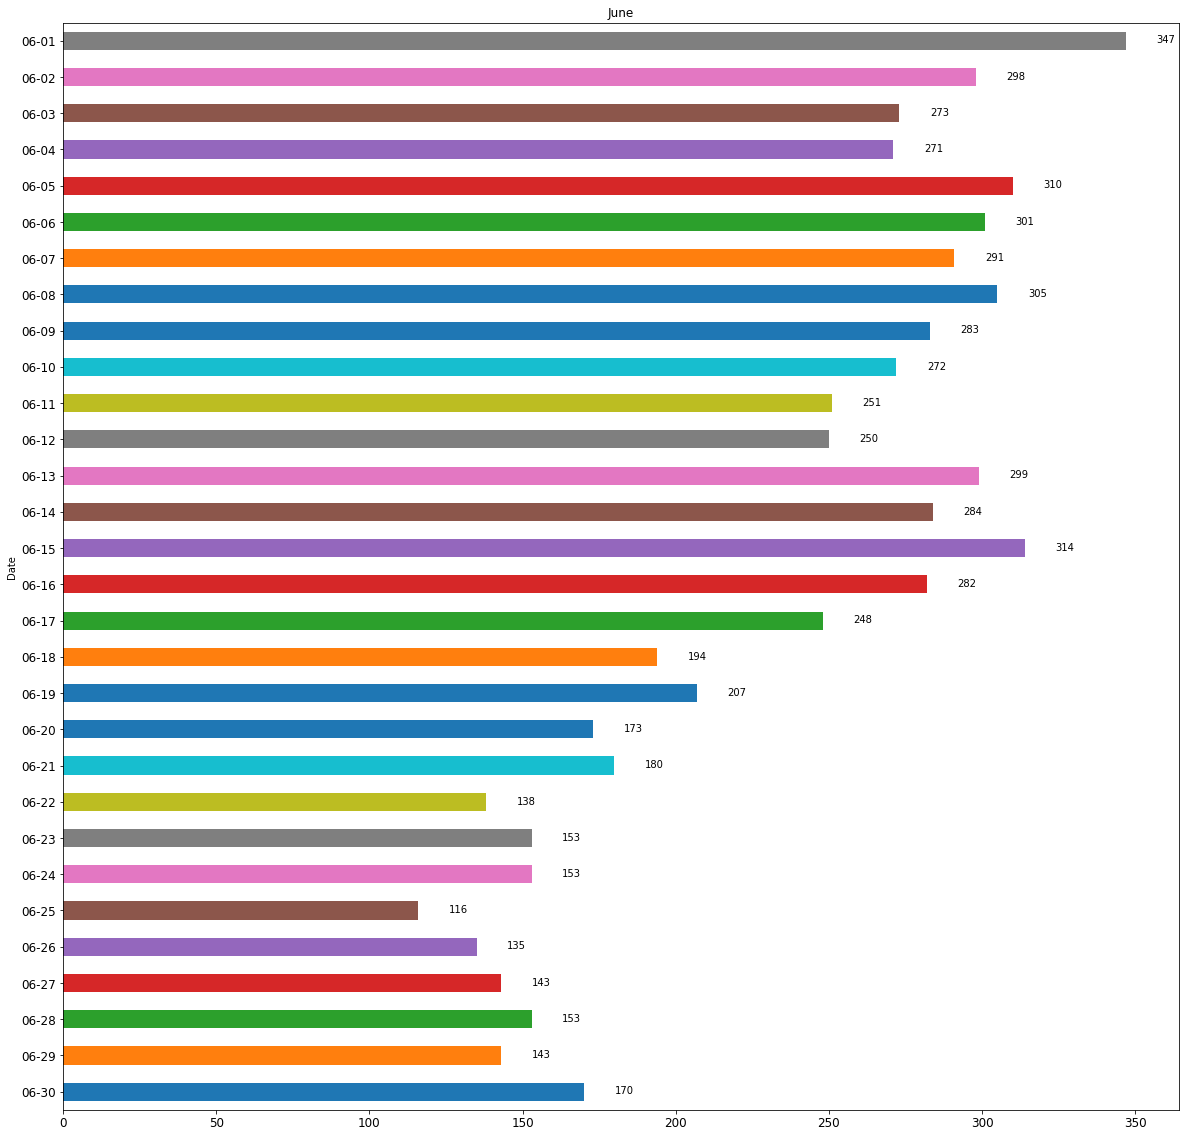

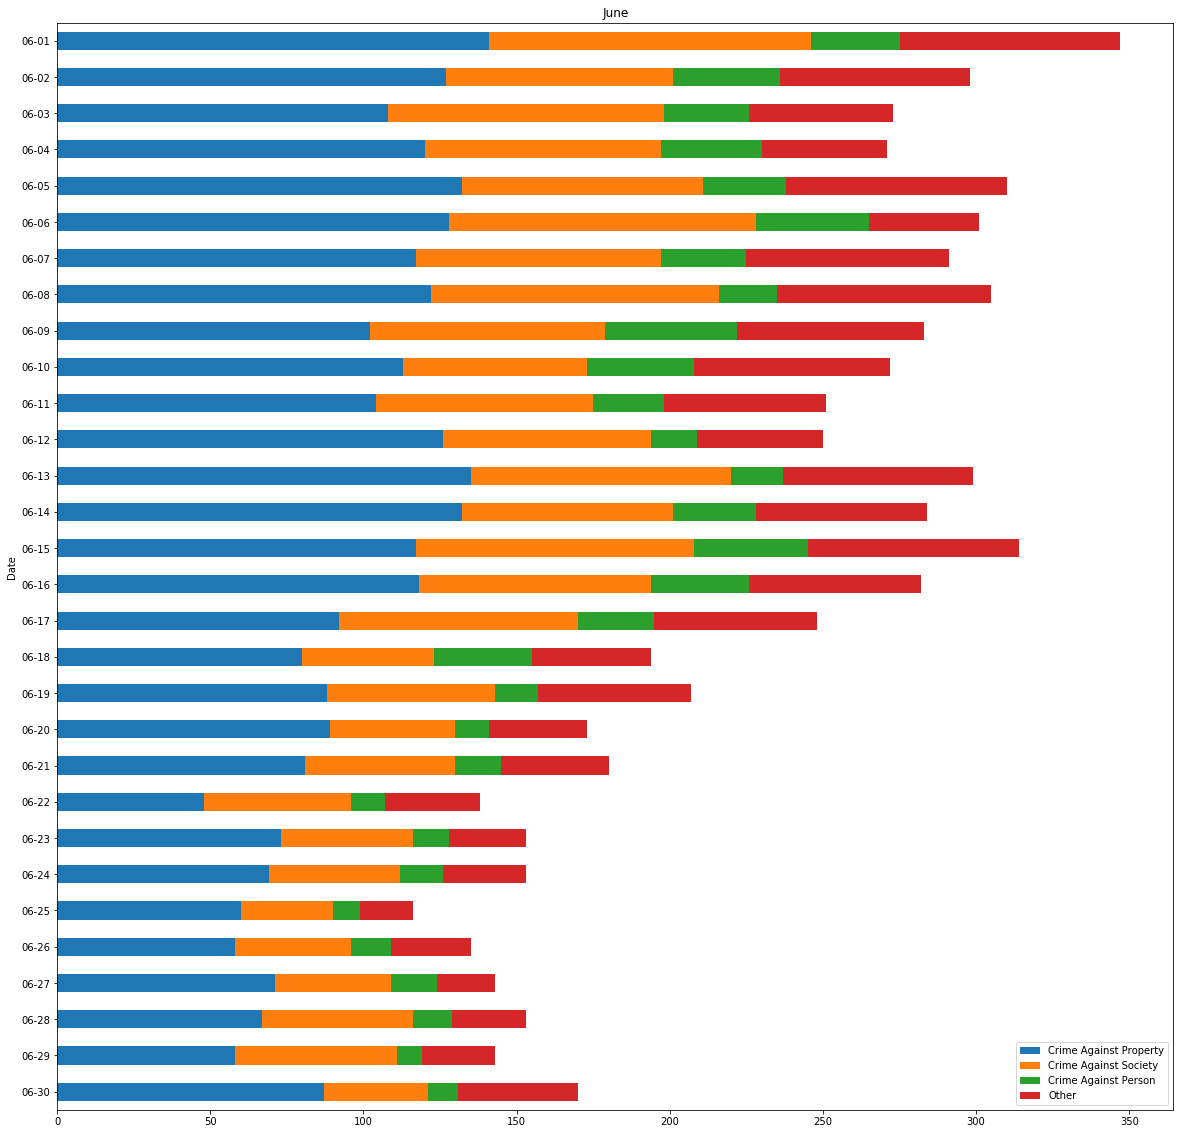

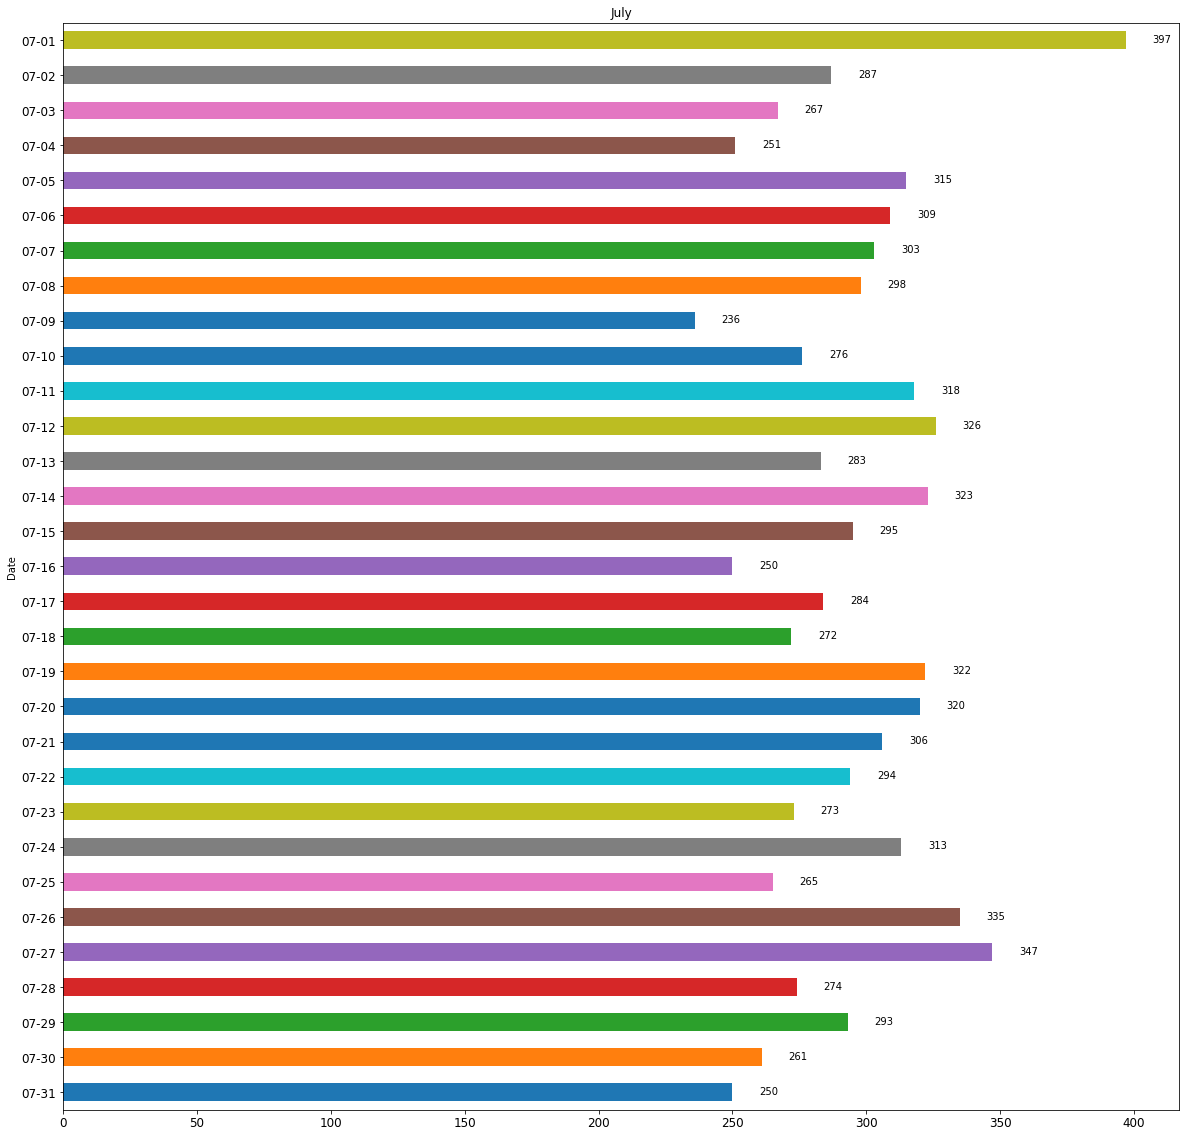

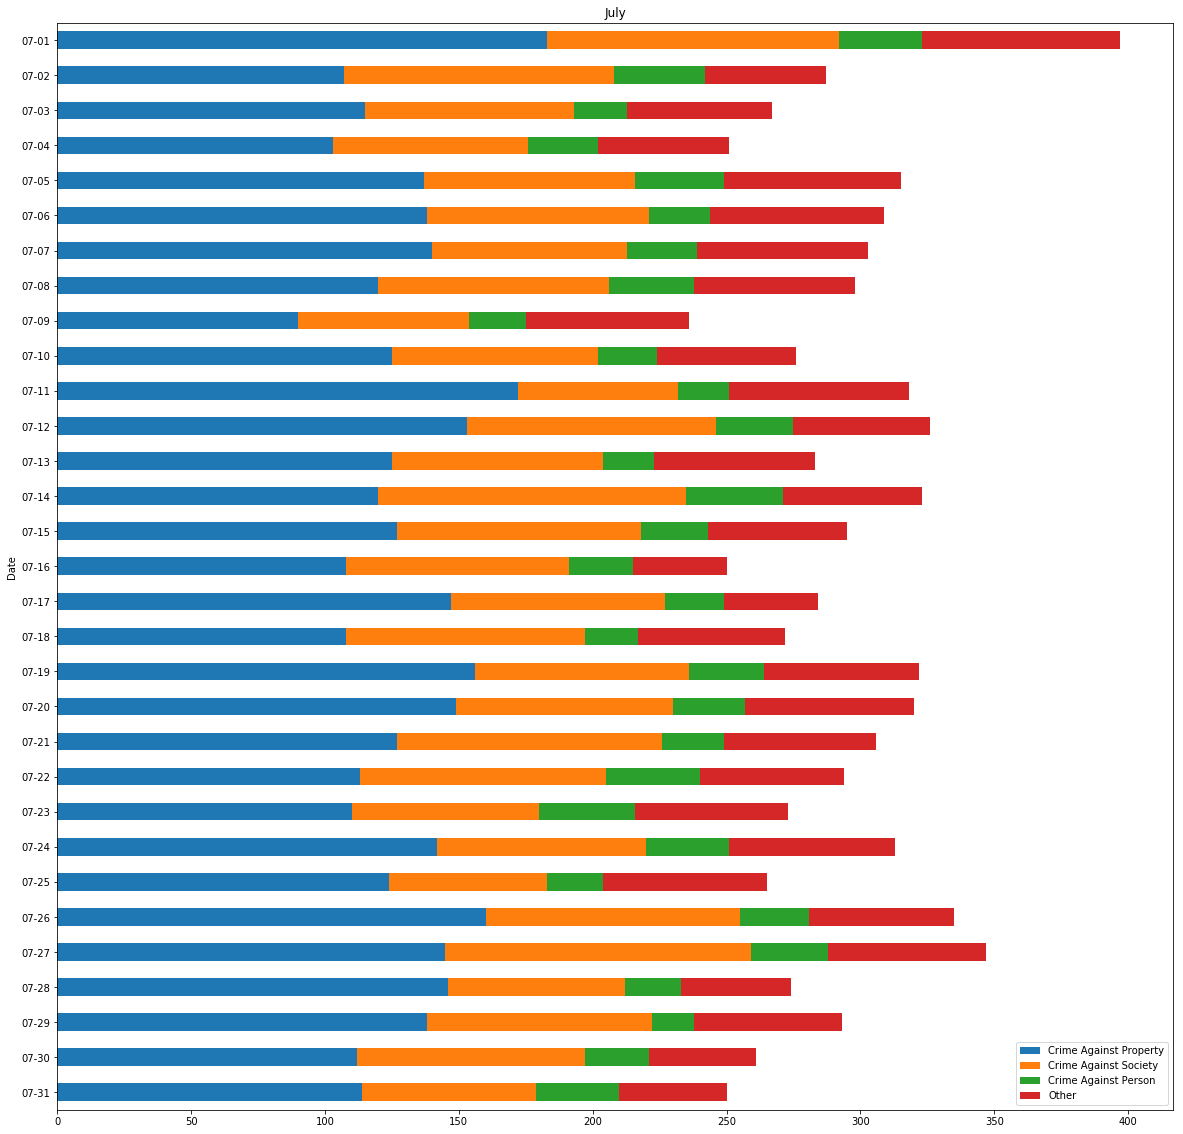

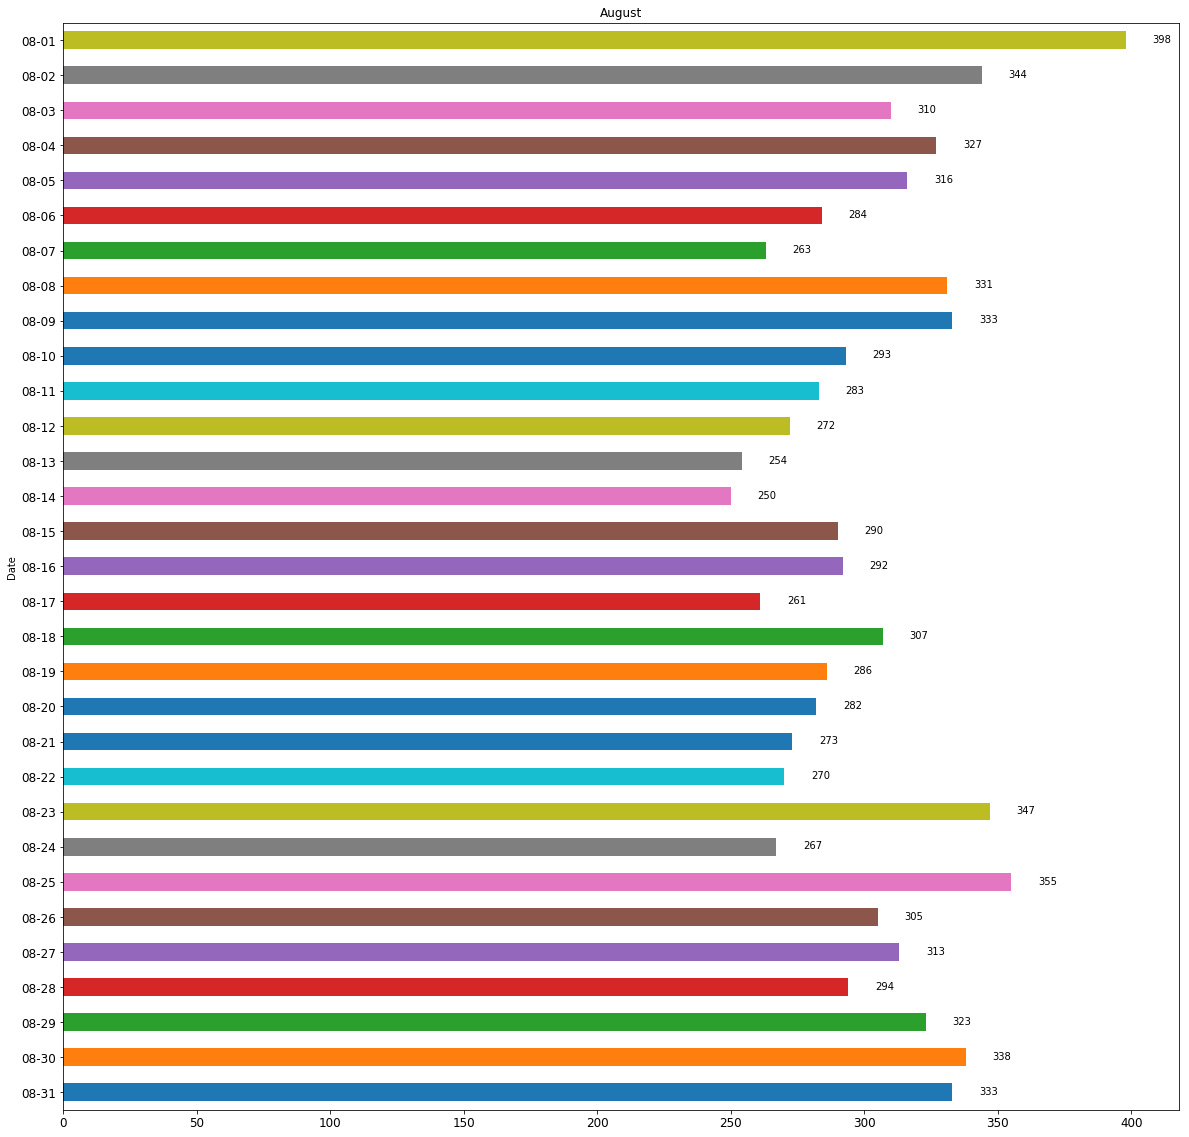

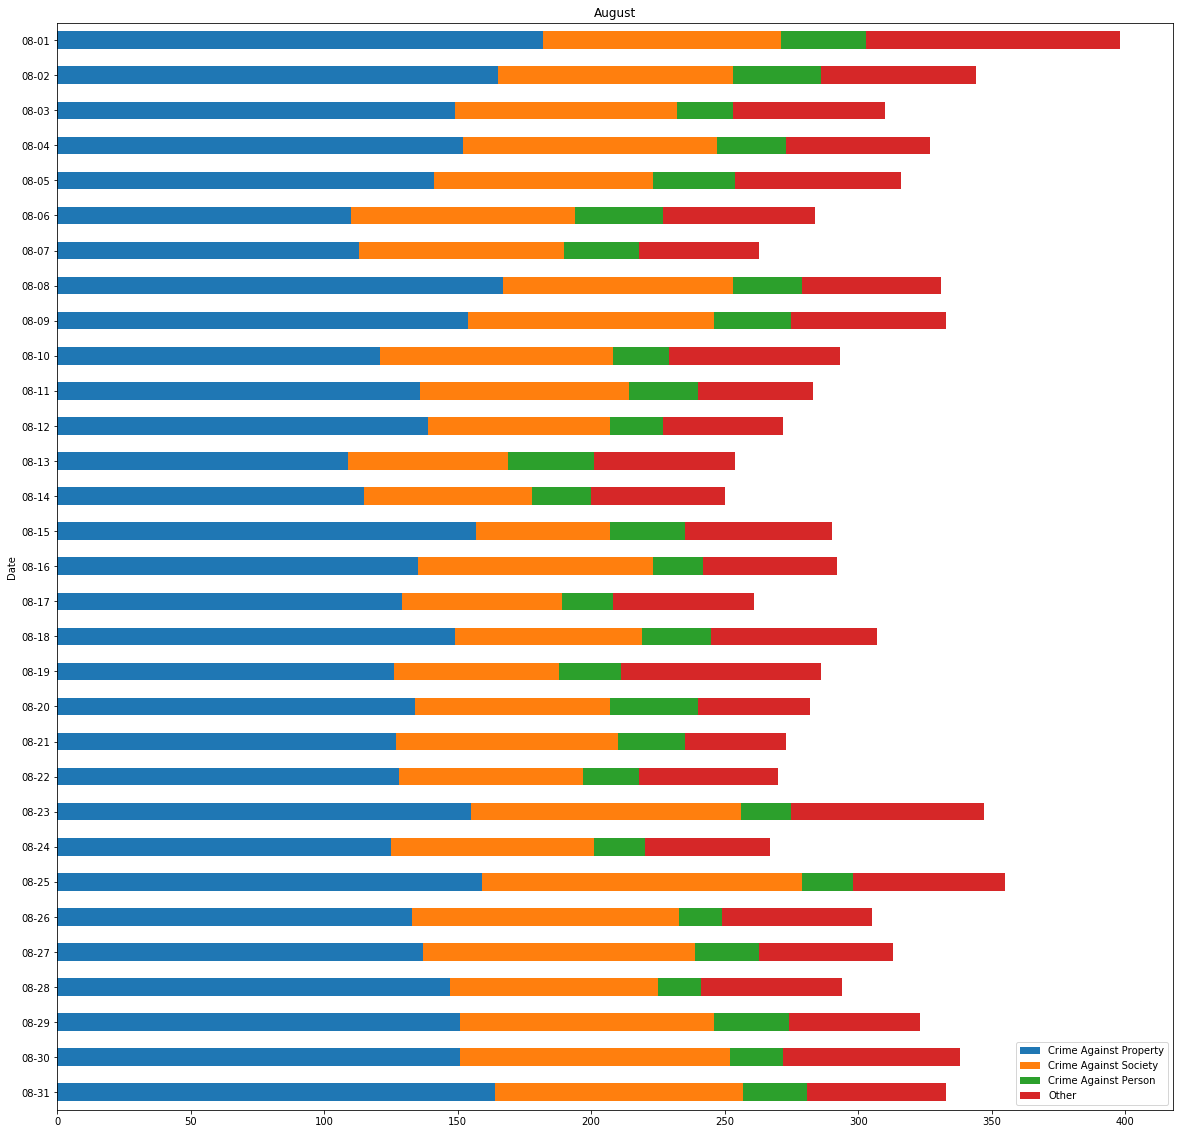

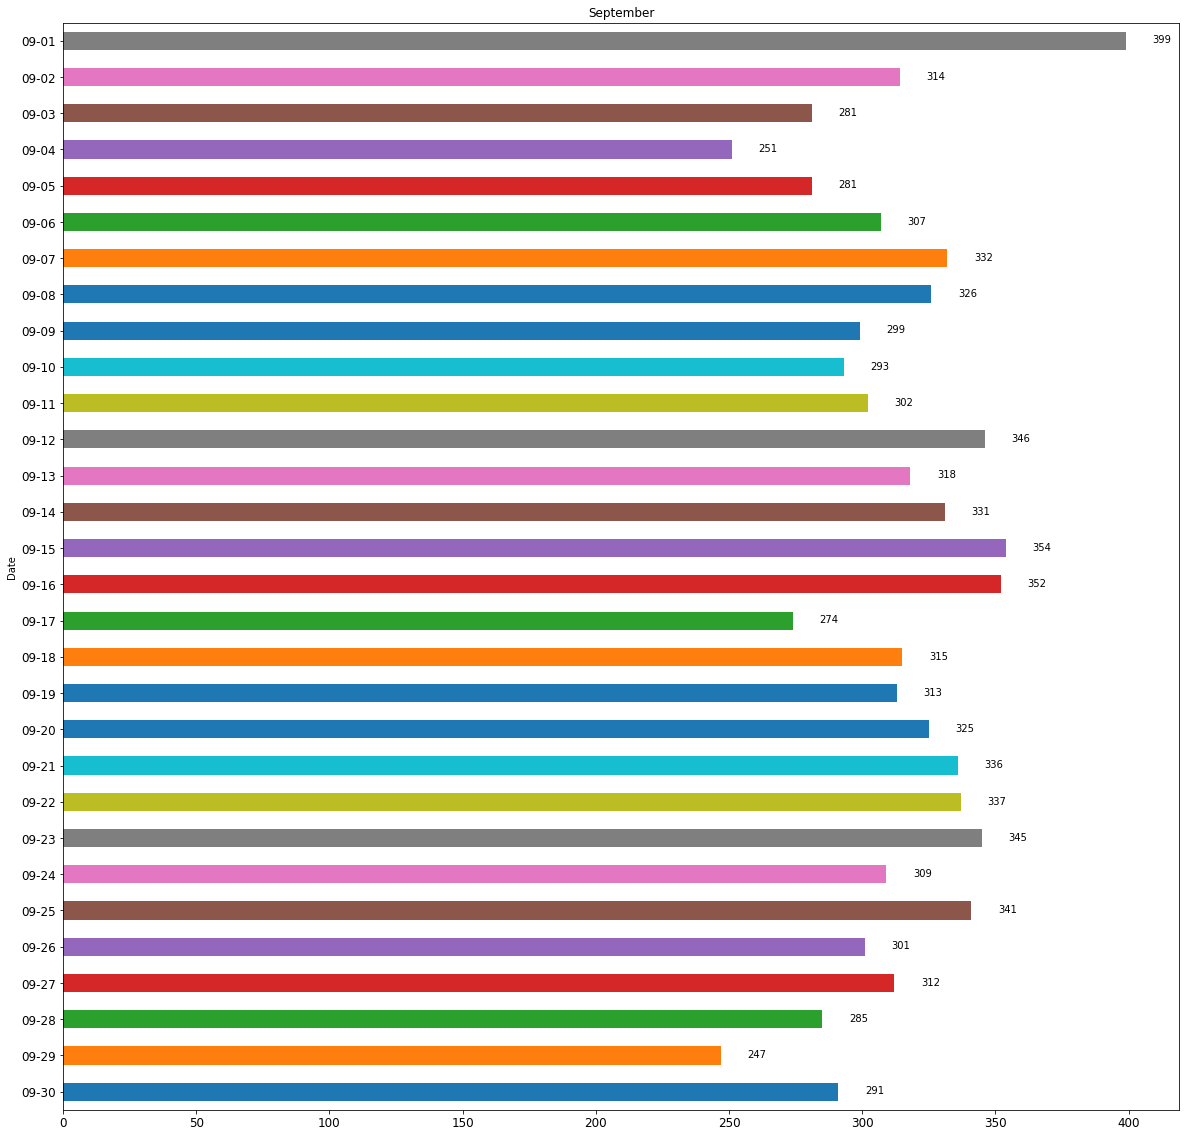

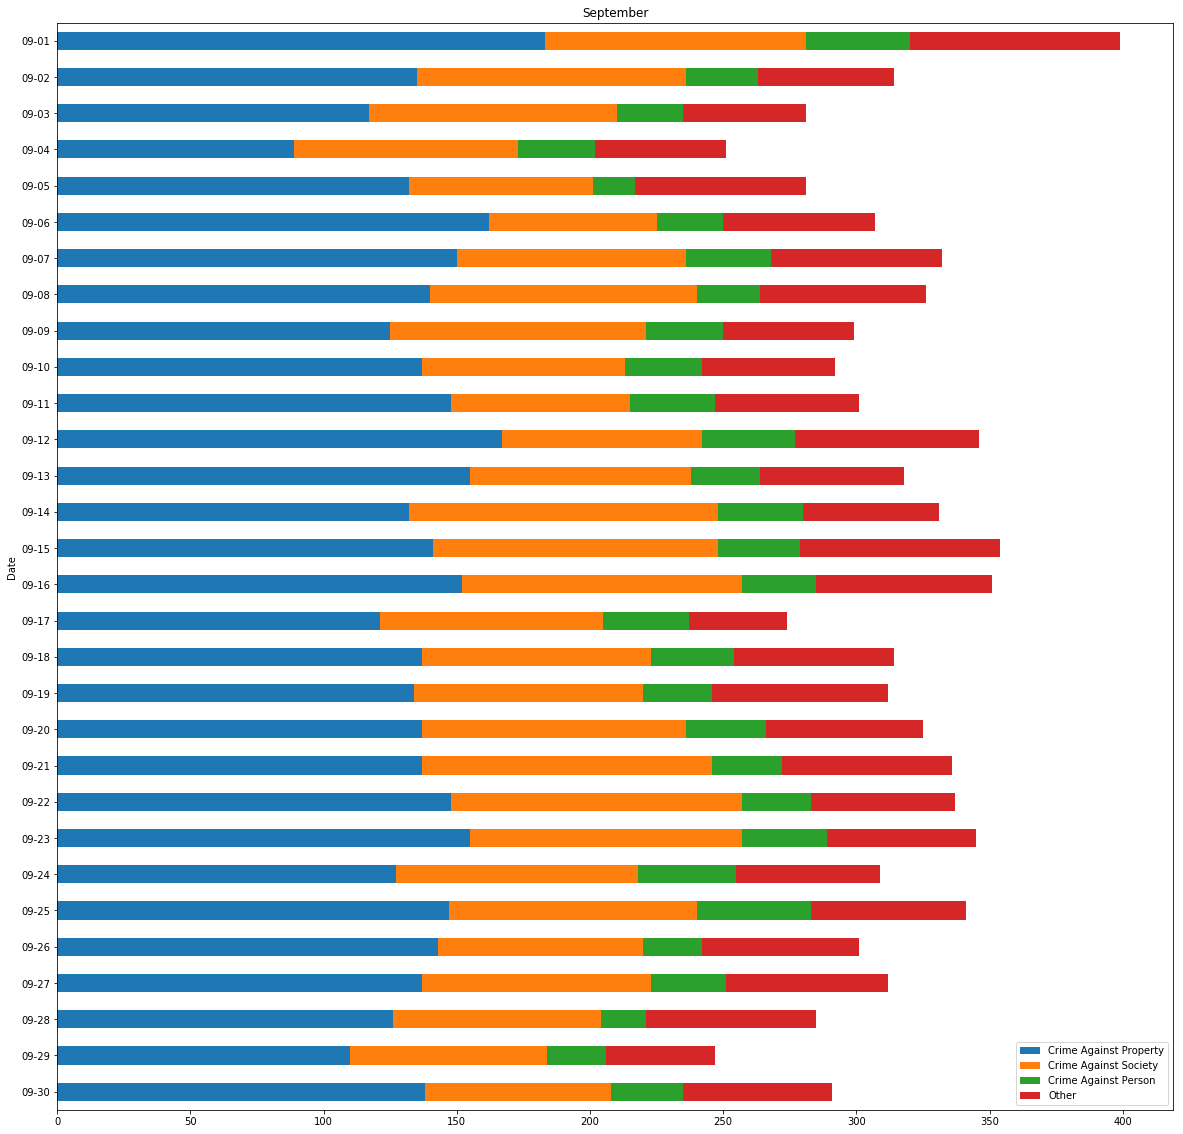

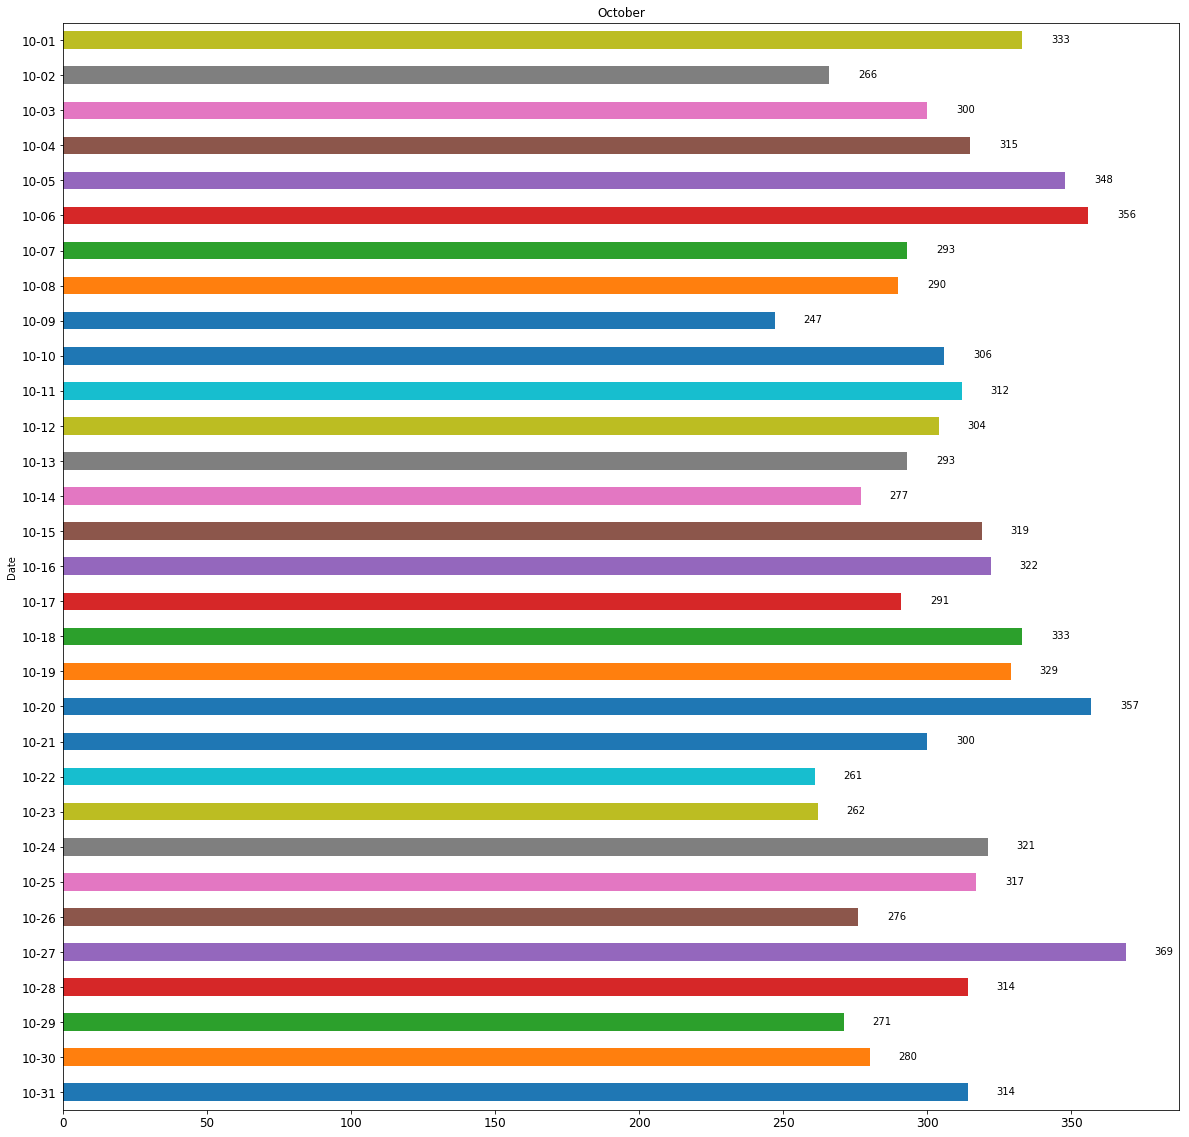

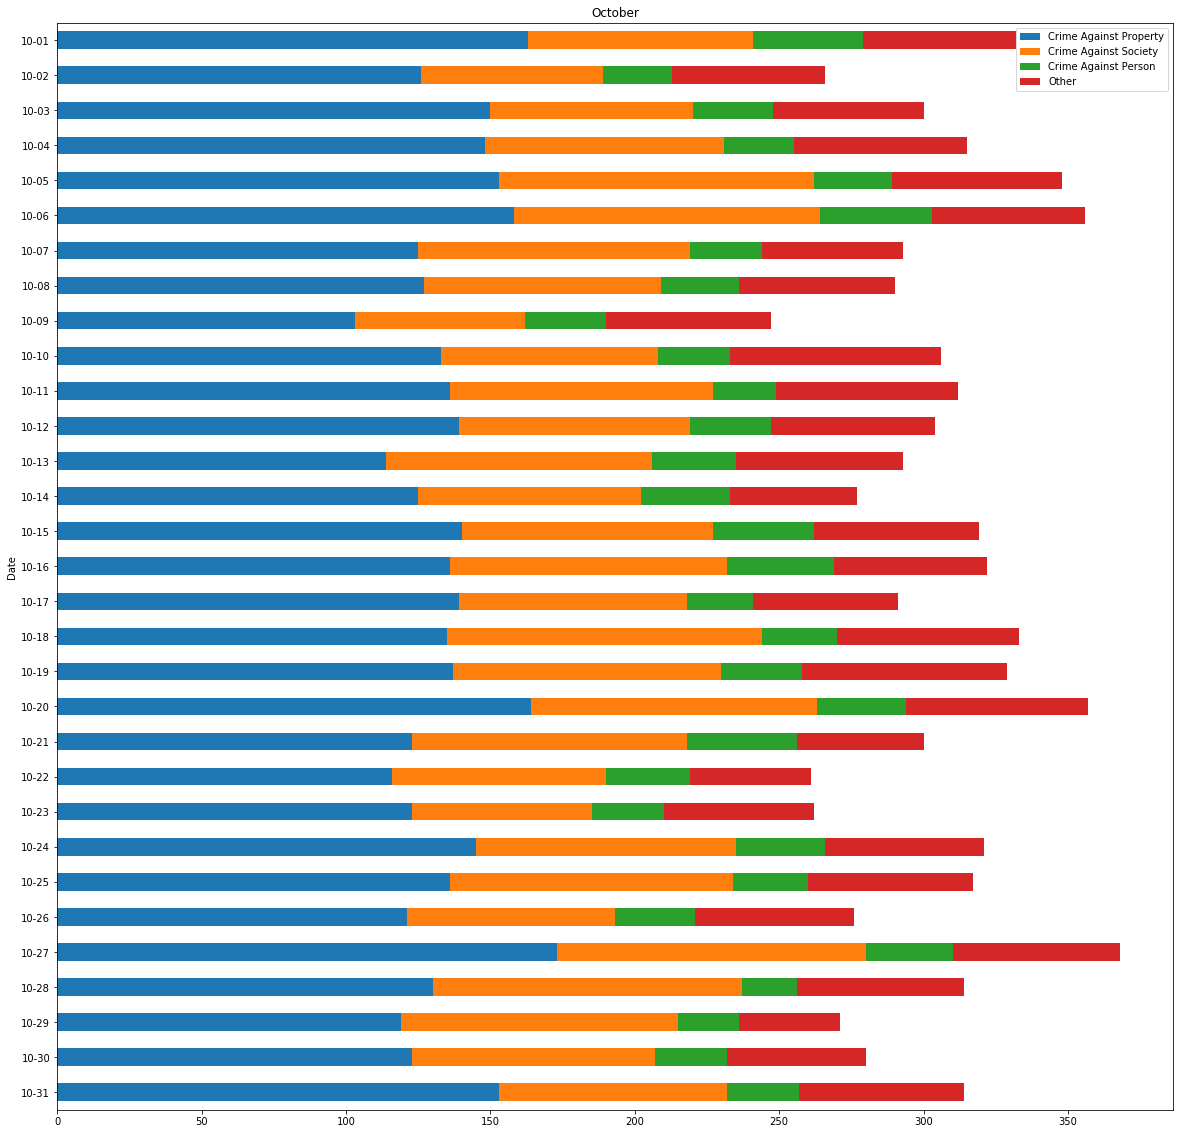

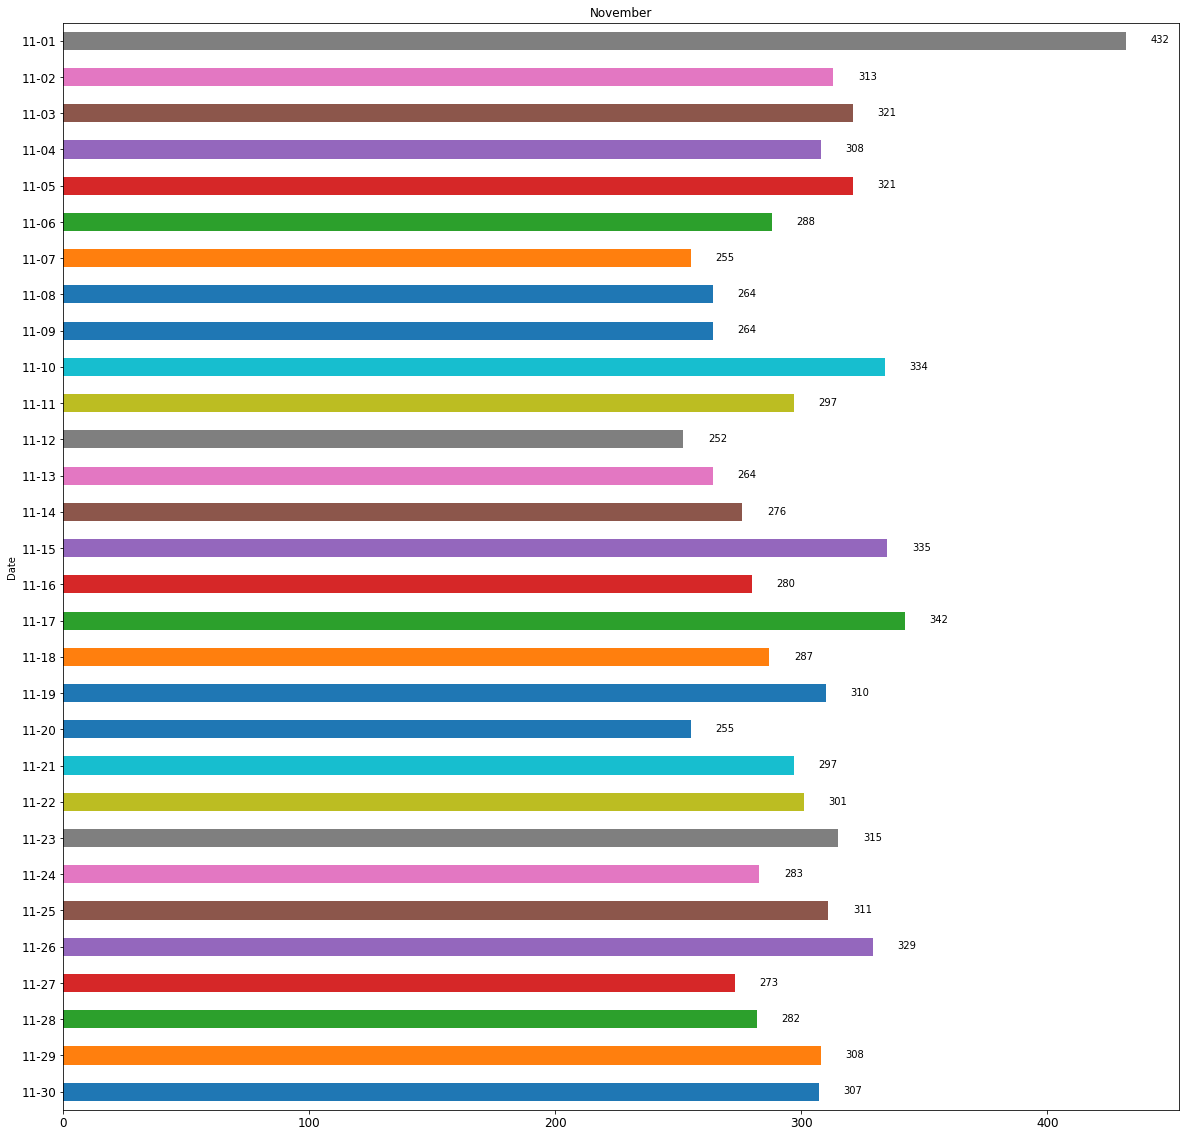

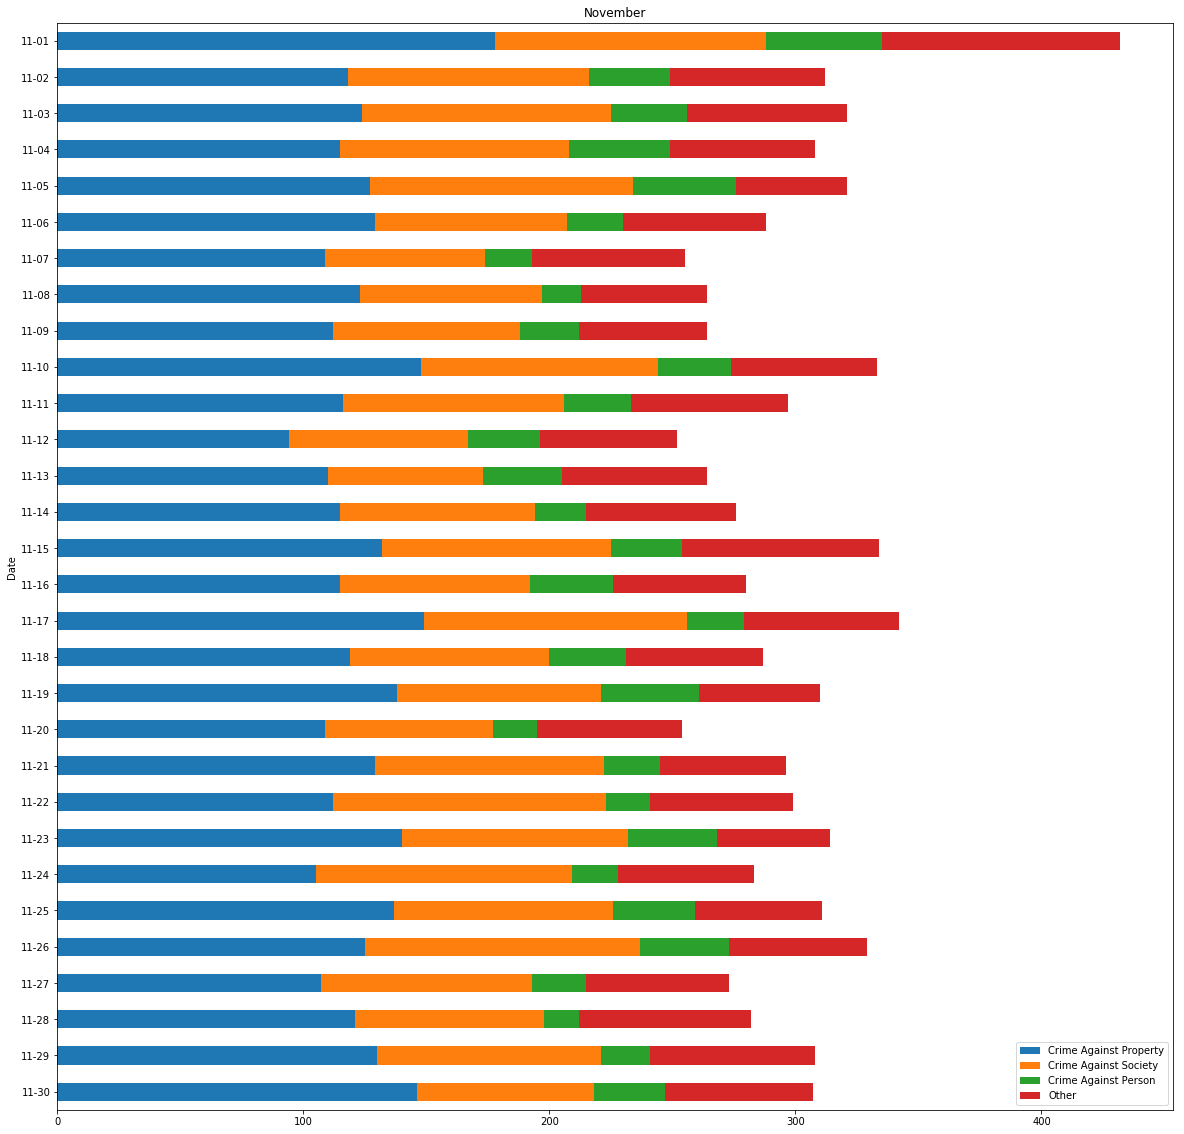

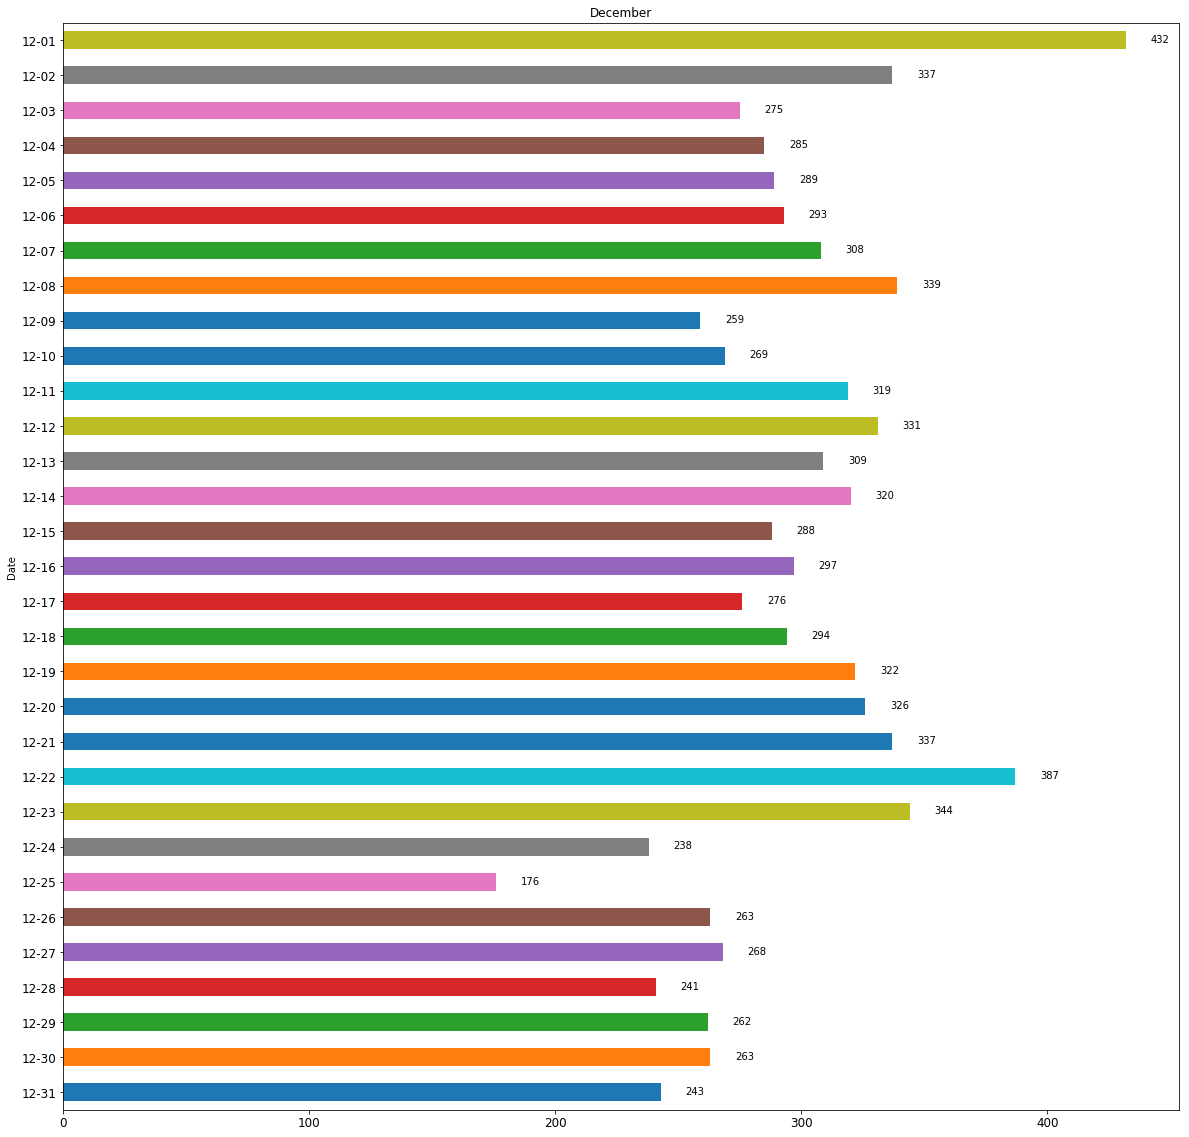

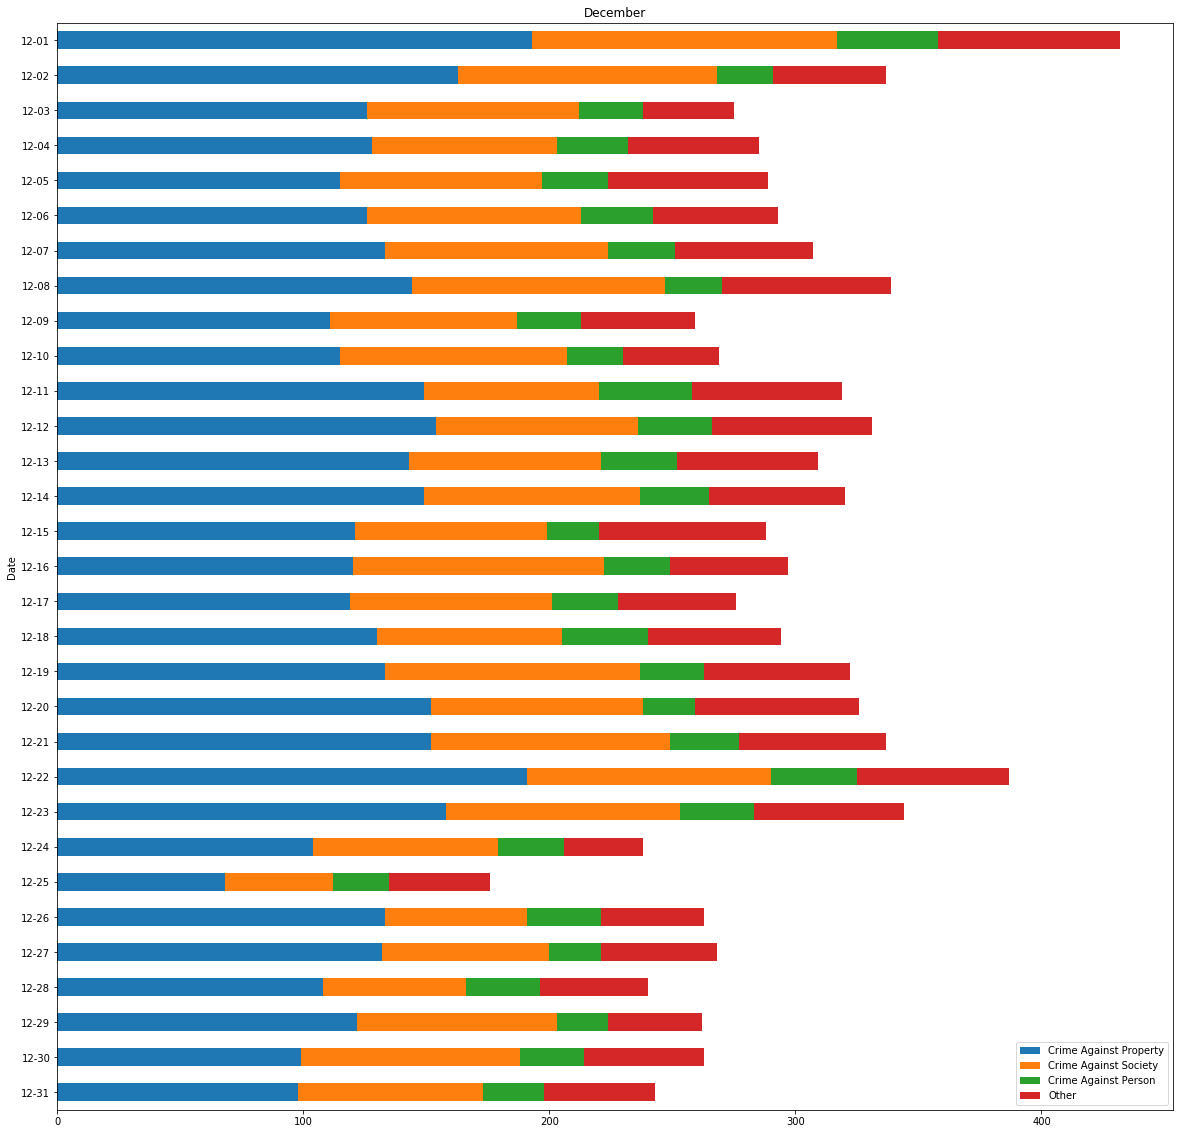

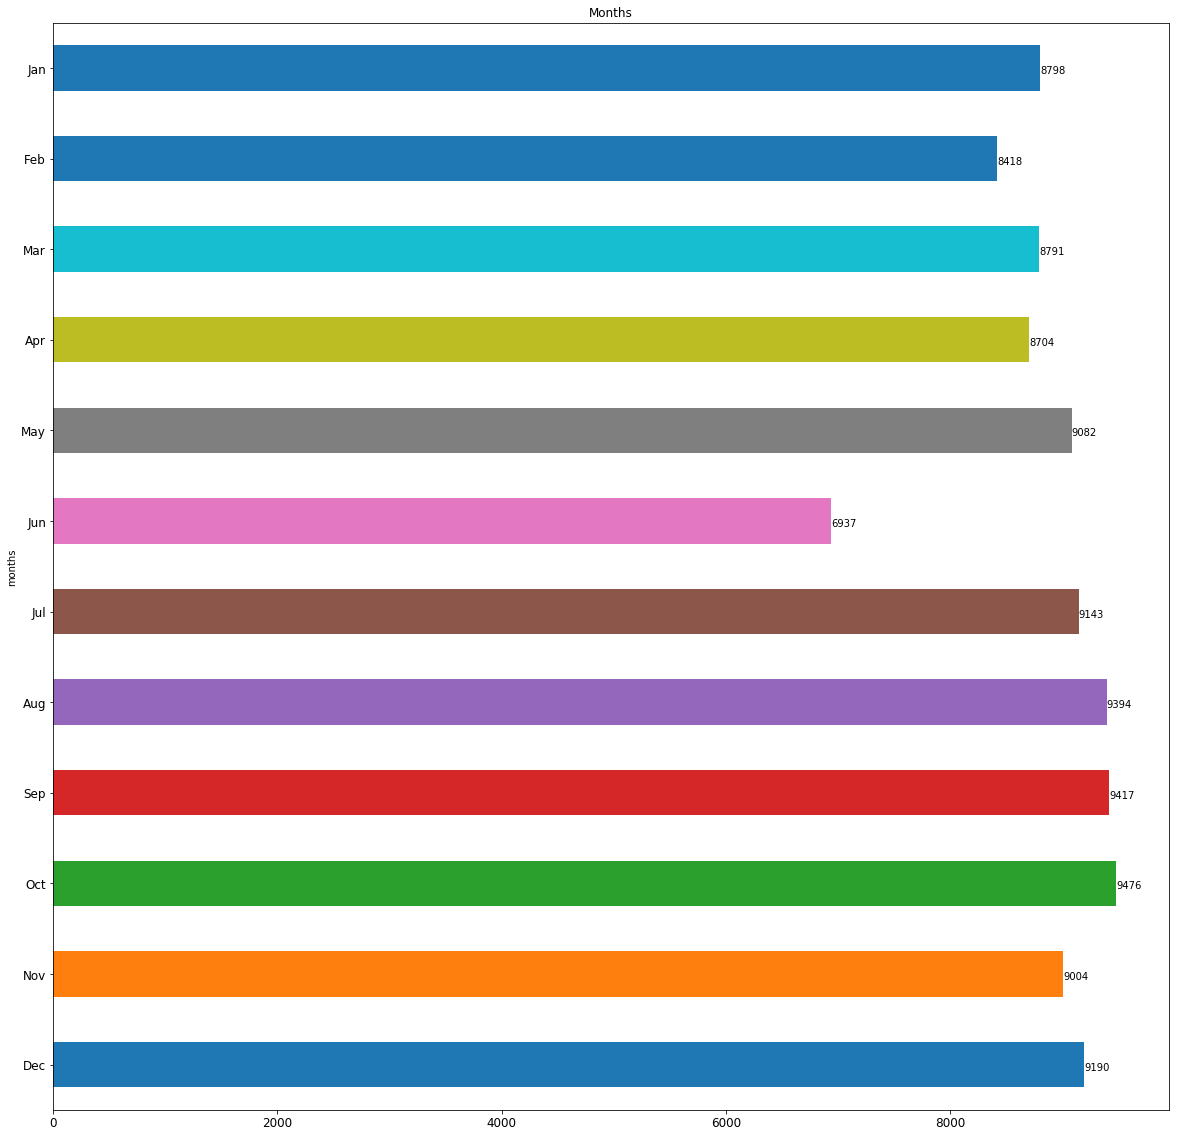

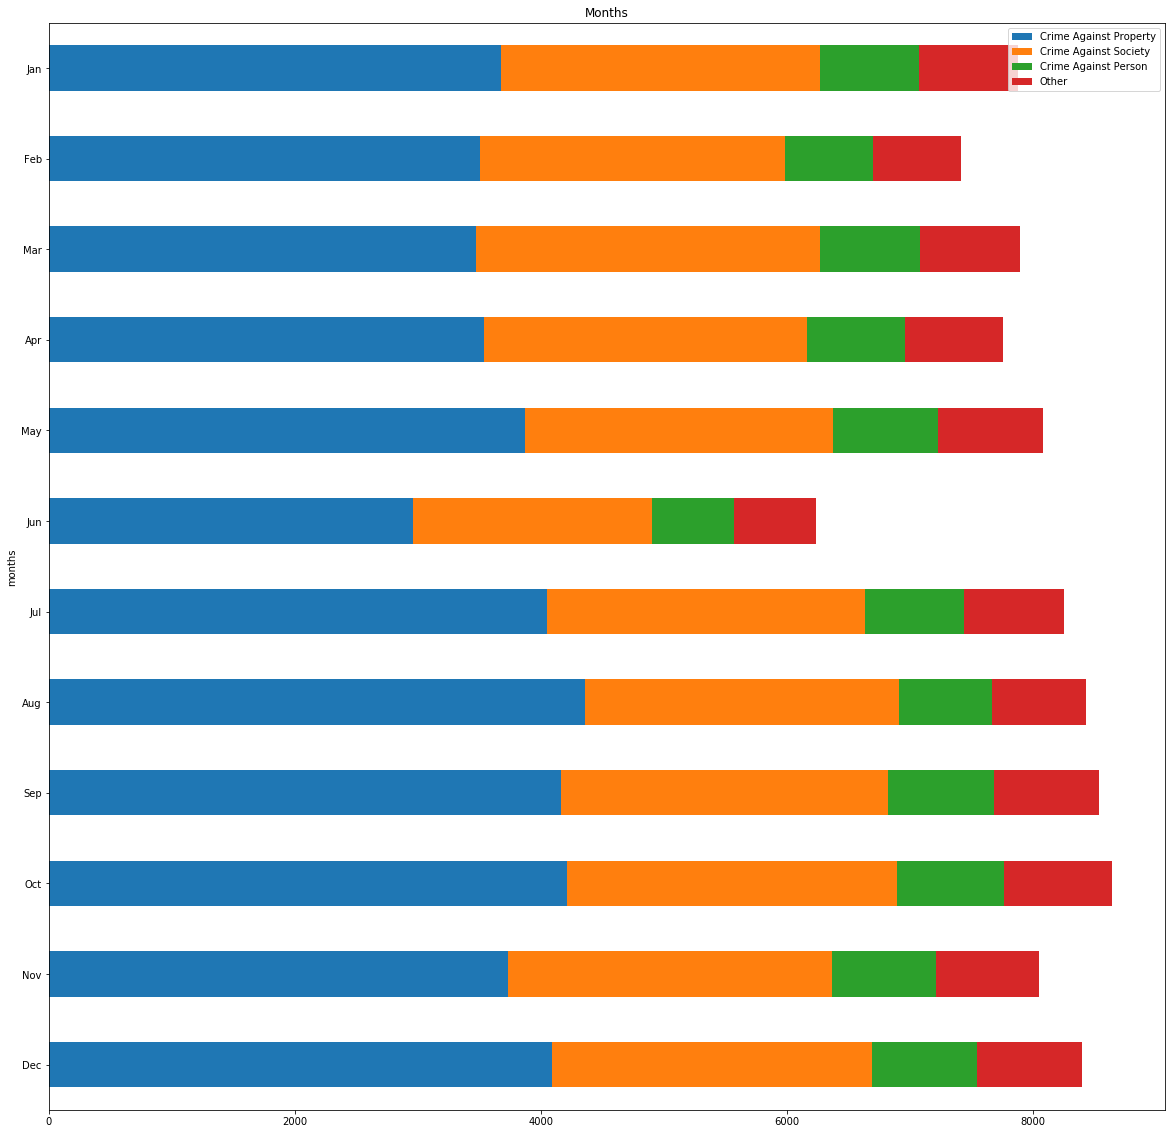

In [16]:
monthandcount(jan,feb,mar,apr,may,jun,jul,aug,sep,octo,nov,dec)

# Crime by hour

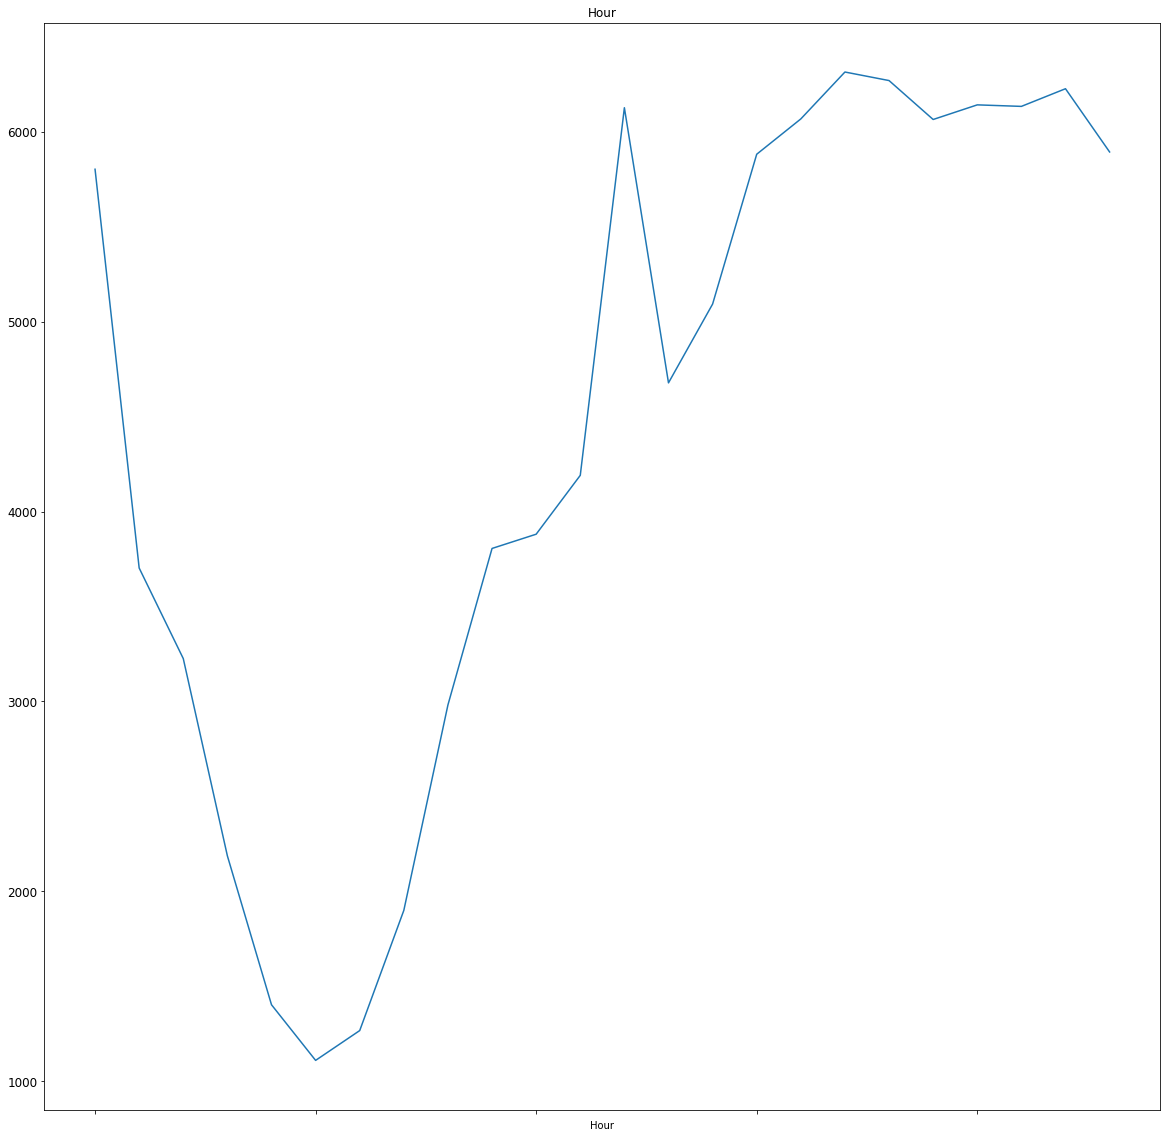

In [17]:
hourvalues = list(map(str, data['Start Time'].value_counts().keys().tolist()))
hourcounts = list(map(int, data['Start Time'].value_counts().tolist()))
ughh = []
ughhh = []
hour = pd.DataFrame({'Hour':hourvalues,'count':hourcounts})
hourbar = hour.sort_values(['Hour'])
hourbar = hourbar.drop([24],axis = 0)
ax = hourbar.plot(x = 'Hour', y = 'count', kind = 'line', figsize = (20,20),title = 'Hour', legend = False, fontsize = 12)